# CHILDES Eng-NA: Age vs Function Word Proportion

In [1]:
import os
import csv
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
# List of CSV files to process
function_files_50 = ['Abe_function50.csv', 'Adam_function50.csv', 'Benjamin_function50.csv', 'Emily_function50.csv', 'Emma_function50.csv', 'Eve_function50.csv', 'Jillian_function50.csv', 'Laura_function50.csv', 'Matt_function50.csv', 'Naomi_function50.csv', 'Nathaniel_function50.csv', 'Nina_function50.csv', 'Roman_function50.csv', 'Ross_function50.csv', 'Shem_function50.csv', 'Sarah_function50.csv', 'Trevor_function50.csv']  # Uses _function50.csv files
function_files_100 = ['Abe_function100.csv', 'Adam_function100.csv', 'Benjamin_function100.csv', 'Emily_function100.csv', 'Emma_function100.csv', 'Eve_function100.csv', 'Jillian_function100.csv', 'Laura_function100.csv', 'Matt_function100.csv', 'Naomi_function100.csv', 'Nathaniel_function100.csv', 'Nina_function100.csv', 'Roman_function100.csv', 'Ross_function100.csv', 'Shem_function100.csv', 'Sarah_function100.csv', 'Trevor_function100.csv']  # Uses _function100.csv files
function_files_all = ['Abe_function.csv', 'Adam_function.csv', 'Benjamin_function.csv', 'Emily_function.csv', 'Emma_function.csv', 'Eve_function.csv', 'Jillian_function.csv', 'Laura_function.csv', 'Matt_function.csv', 'Naomi_function.csv', 'Nathaniel_function.csv', 'Nina_function.csv', 'Roman_function.csv', 'Ross_function.csv', 'Shem_function.csv', 'Sarah_function.csv', 'Trevor_function.csv']  # Uses _function.csv files

# Initialize a 2D array to store Spearman's rho values for each CSV file
spearman_rhos_50 = []
spearman_rhos_100 = []
spearman_rhos_all = []

# Load the original _mlu.csv files to get ages (they are the only files that have the corresponding ages for each transcript)
age_files = ['Abe_mlu.csv', 'Adam_mlu.csv', 'Benjamin_mlu.csv', 'Emily_mlu.csv', 'Emma_mlu.csv', 'Eve_mlu.csv', 'Jillian_mlu.csv', 'Laura_mlu.csv', 'Matt_mlu.csv', 'Naomi_mlu.csv', 'Nathaniel_mlu.csv', 'Nina_mlu.csv', 'Roman_mlu.csv', 'Ross_mlu.csv', 'Shem_mlu.csv', 'Sarah_mlu.csv', 'Trevor_mlu.csv']

In [3]:
def age_in_months(age_str):
    parts = age_str.split(';')
    if len(parts) == 2:  # Example Format: "2;11.28", "2;05.", or "3;"
        years = int(parts[0])
        months_and_days = parts[1].split('.')
        
        # Handle cases where days are not provided
        if months_and_days[0] == '':
            months = 0  # Assume 00 months if no months are provided
        else:
            months = float(months_and_days[0])
        
        # Check if the month format ends with a dot, indicating missing days
        if len(months_and_days) > 1 and months_and_days[1] == '':
            days = 0  # Assume 00 days if no days are provided
        else:
            days = float(months_and_days[1]) if len(months_and_days) > 1 else 0
        
        months += days / 30  # Keep decimal for days
        return years * 12 + months
    return 0  # Consider raising an error instead of returning 0 for invalid formats

In [4]:
def age_function_plots(function_files, spearman_rhos, age_files):
    age_data = {}

    for age_file in age_files:
        if os.path.exists(age_file):
            with open(age_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)
                # Store ages in a dictionary with the base filename as the key
                for entry in data:
                    base_filename = entry['File'].split('.')[0]  # Get the base filename
                    age_data[base_filename] = age_in_months(entry['Age'])  # Store the age

    for function_file in function_files:
        # Check if the file exists before attempting to open it
        if os.path.exists(function_file):
            with open(function_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)

            # Initialize list to hold chosen transcripts and their function word proportions
            chosen_transcripts = []
            transcript_list = []
            time_steps = []  # New list to hold time steps

            # Select the first transcript
            if data:  # Check if there is any data
                first_data = data[0]
                # Extract the base filename to get the corresponding age
                base_filename = first_data['File'].split('.')[0]
                first_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                chosen_transcripts.append((first_age, float(first_data['Function Word Proportion'])))
                transcript_list.append(first_data['File'])  # Collect the first transcript name

                last_chosen_age = first_age

                # Select subsequent transcripts that are at least 1 month apart
                for entry in data[1:]:  # Start from the second transcript
                    base_filename = entry['File'].split('.')[0]
                    current_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                    if current_age - last_chosen_age >= 1:
                        chosen_transcripts.append((current_age, float(entry['Function Word Proportion'])))  # Collect age and function word proportion
                        transcript_list.append(entry['File'])  # Collect the transcript name
                        time_steps.append(current_age - last_chosen_age)  # Calculate time step without rounding
                        last_chosen_age = current_age

            # Plot Age vs Function Word Proportion
            ages = [t[0] for t in chosen_transcripts]
            function_word_proportions = [t[1] for t in chosen_transcripts]

            plt.figure(figsize=(10, 5))
            plt.scatter(ages, function_word_proportions, marker='o')  # scatter plot
            plt.title(f'Age vs Function Word Proportion for {function_file}')
            plt.xlabel('Age (months)')
            plt.ylabel('Function Word Proportion')
            plt.grid()
            plt.show()       

            # Calculate Spearman's rho
            if len(ages) > 1:  # Ensure there are enough data points
                spearman_corr, _ = spearmanr(ages, function_word_proportions)
                spearman_rhos.append([function_file, spearman_corr])  # Store the file name and Spearman's rho value
                print(f"Spearman's rho for {function_file}: {spearman_corr:.4f}\n")

            # Print the list of chosen transcripts, converted ages, and time steps
            print(f"Chosen Transcripts for {function_file}: \n", transcript_list, "\n")
            print(f"Function Word Proportions for {function_file}: \n", function_word_proportions, "\n")  # Print the function word proportions
            print(f"Ages for {function_file}: \n", ages, "\n")  # Print the converted ages
            print(f"Time Steps for {function_file}: \n", time_steps, "\n")  # Print the time steps

## Age vs Function Word Proportion (50 Utterances)

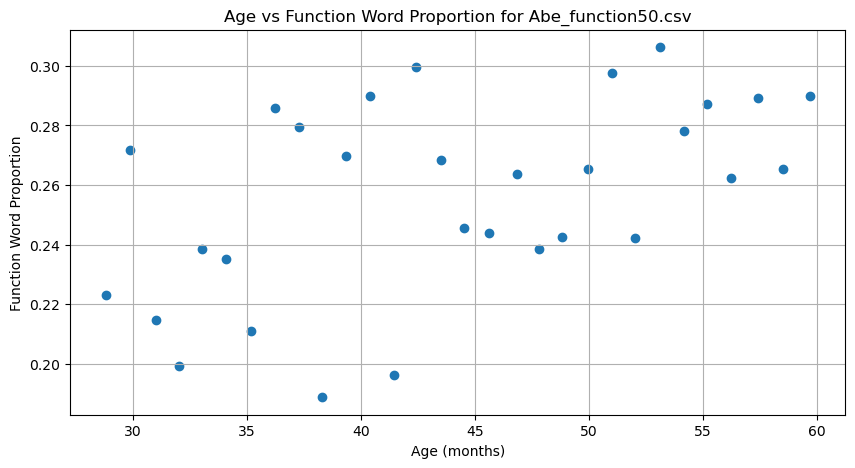

Spearman's rho for Abe_function50.csv: 0.4772

Chosen Transcripts for Abe_function50.csv: 
 ['020424.ipcore.cex', '020526.ipcore.cex', '020700.ipcore.cex', '020801.ipcore.cex', '020901.ipcore.cex', '021003.ipcore.cex', '021106.ipcore.cex', '030007.ipcore.cex', '030108.ipcore.cex', '030209.ipcore.cex', '030311.ipcore.cex', '030412.ipcore.cex', '030513.ipcore.cex', '030613.ipcore.cex', '030715.ipcore.cex', '030816.ipcore.cex', '030919.ipcore.cex', '031025.ipcore.cex', '031125.ipcore.cex', '040025.ipcore.cex', '040129.ipcore.cex', '040301.ipcore.cex', '040401.ipcore.cex', '040503.ipcore.cex', '040605.ipcore.cex', '040705.ipcore.cex', '040807.ipcore.cex', '040912.ipcore.cex', '041015.ipcore.cex', '041121.ipcore.cex'] 

Function Word Proportions for Abe_function50.csv: 
 [0.22317596566523606, 0.27181208053691275, 0.2147887323943662, 0.19924812030075187, 0.23863636363636365, 0.23509933774834438, 0.21115537848605578, 0.2857142857142857, 0.2795275590551181, 0.18875502008032127, 0.2697841726618

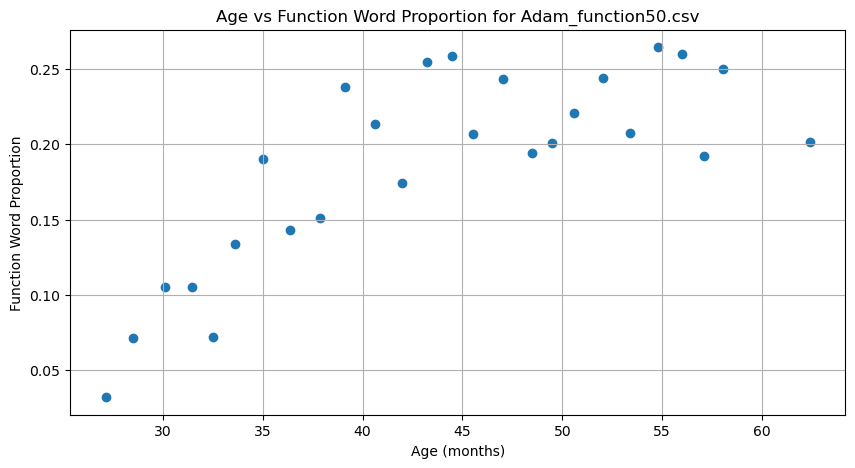

Spearman's rho for Adam_function50.csv: 0.7338

Chosen Transcripts for Adam_function50.csv: 
 ['020304.ipcore.cex', '020415.ipcore.cex', '020603.ipcore.cex', '020714.ipcore.cex', '020816.ipcore.cex', '020918.ipcore.cex', '021030.ipcore.cex', '030011.ipcore.cex', '030126.ipcore.cex', '030304.ipcore.cex', '030418.ipcore.cex', '030529.ipcore.cex', '030707.ipcore.cex', '030814.ipcore.cex', '030916.ipcore.cex', '031101.ipcore.cex', '040014.ipcore.cex', '040115.ipcore.cex', '040217.ipcore.cex', '040401.ipcore.cex', '040511.ipcore.cex', '040624.ipcore.cex', '040729.ipcore.cex', '040902.ipcore.cex', '041002.ipcore.cex', '050212.ipcore.cex'] 

Function Word Proportions for Adam_function50.csv: 
 [0.03184713375796178, 0.07142857142857142, 0.10526315789473684, 0.10526315789473684, 0.0718954248366013, 0.13368983957219252, 0.19, 0.14285714285714285, 0.1507537688442211, 0.23788546255506607, 0.2134387351778656, 0.1743119266055046, 0.2549019607843137, 0.2585551330798479, 0.20717131474103587, 0.2432432

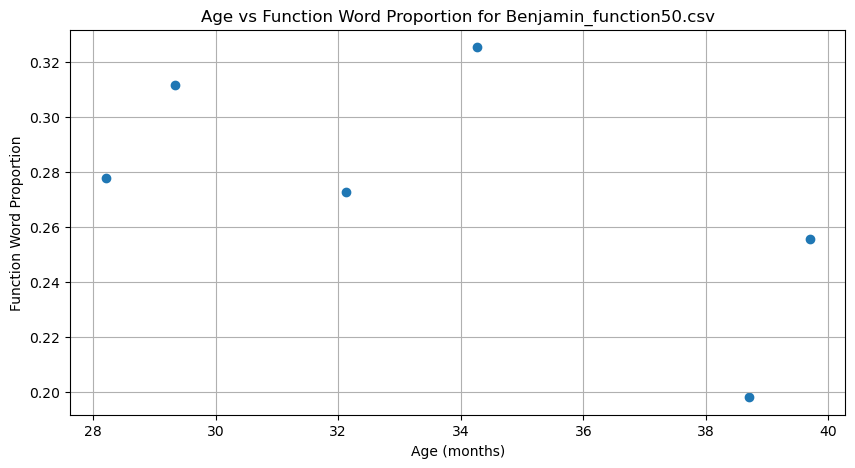

Spearman's rho for Benjamin_function50.csv: -0.5429

Chosen Transcripts for Benjamin_function50.csv: 
 ['020406.ipcore.cex', '020510.ipcore.cex', '020804.ipcore.cex', '021008.ipcore.cex', '030221.ipcore.cex', '030321.ipcore.cex'] 

Function Word Proportions for Benjamin_function50.csv: 
 [0.2777777777777778, 0.3114754098360656, 0.2727272727272727, 0.3253012048192771, 0.19823788546255505, 0.25572519083969464] 

Ages for Benjamin_function50.csv: 
 [28.2, 29.333333333333332, 32.13333333333333, 34.266666666666666, 38.7, 39.7] 

Time Steps for Benjamin_function50.csv: 
 [1.1333333333333329, 2.8000000000000007, 2.133333333333333, 4.433333333333337, 1.0] 



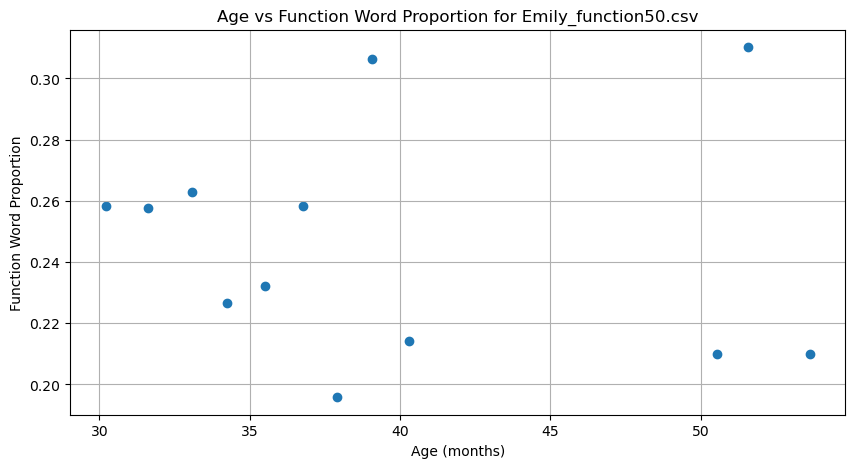

Spearman's rho for Emily_function50.csv: -0.2587

Chosen Transcripts for Emily_function50.csv: 
 ['020606.ipcore.cex', '020718.ipcore.cex', '020902.ipcore.cex', '021007.ipcore.cex', '021115.ipcore.cex', '030023.ipcore.cex', '030127.ipcore.cex', '030302.ipcore.cex', '030409.ipcore.cex', '040216.ipcore.cex', '040317.ipcore.cex', '040519.ipcore.cex'] 

Function Word Proportions for Emily_function50.csv: 
 [0.2584745762711864, 0.2577777777777778, 0.26277372262773724, 0.22666666666666666, 0.23220973782771537, 0.2581967213114754, 0.19583333333333333, 0.3062730627306273, 0.21428571428571427, 0.20987654320987653, 0.31020408163265306, 0.2100456621004566] 

Ages for Emily_function50.csv: 
 [30.2, 31.6, 33.06666666666666, 34.233333333333334, 35.5, 36.766666666666666, 37.9, 39.06666666666667, 40.3, 50.53333333333333, 51.56666666666666, 53.63333333333333] 

Time Steps for Emily_function50.csv: 
 [1.4000000000000021, 1.4666666666666615, 1.1666666666666714, 1.2666666666666657, 1.2666666666666657, 1.1

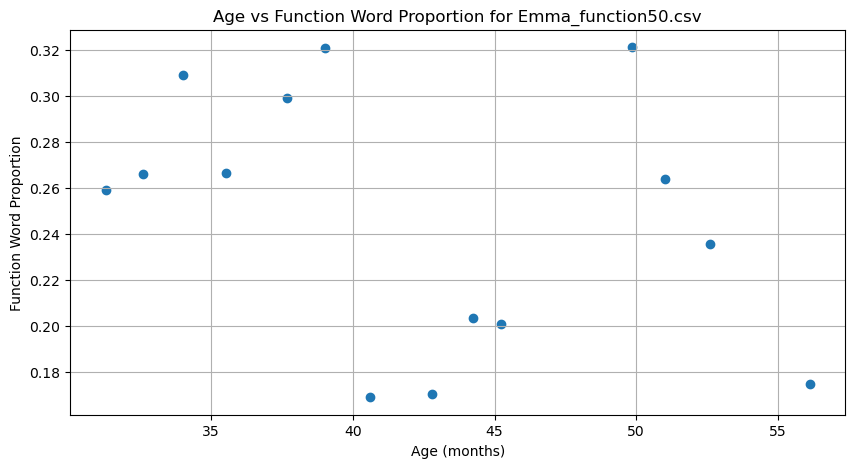

Spearman's rho for Emma_function50.csv: -0.3319

Chosen Transcripts for Emma_function50.csv: 
 ['020708.ipcore.cex', '020818.ipcore.cex', '021000.ipcore.cex', '021116.ipcore.cex', '030120.ipcore.cex', '030300.ipcore.cex', '030418.ipcore.cex', '030624.ipcore.cex', '030807.ipcore.cex', '030907.ipcore.cex', '040125.ipcore.cex', '040300.ipcore.cex', '040418.ipcore.cex', '040804.ipcore.cex'] 

Function Word Proportions for Emma_function50.csv: 
 [0.2590909090909091, 0.2661290322580645, 0.30916030534351147, 0.26666666666666666, 0.29927007299270075, 0.32098765432098764, 0.16908212560386474, 0.17040358744394618, 0.20361990950226244, 0.20081967213114754, 0.32113821138211385, 0.26373626373626374, 0.23577235772357724, 0.17488789237668162] 

Ages for Emma_function50.csv: 
 [31.266666666666666, 32.6, 34.0, 35.53333333333333, 37.666666666666664, 39.0, 40.6, 42.8, 44.233333333333334, 45.233333333333334, 49.833333333333336, 51.0, 52.6, 56.13333333333333] 

Time Steps for Emma_function50.csv: 
 [1.3333

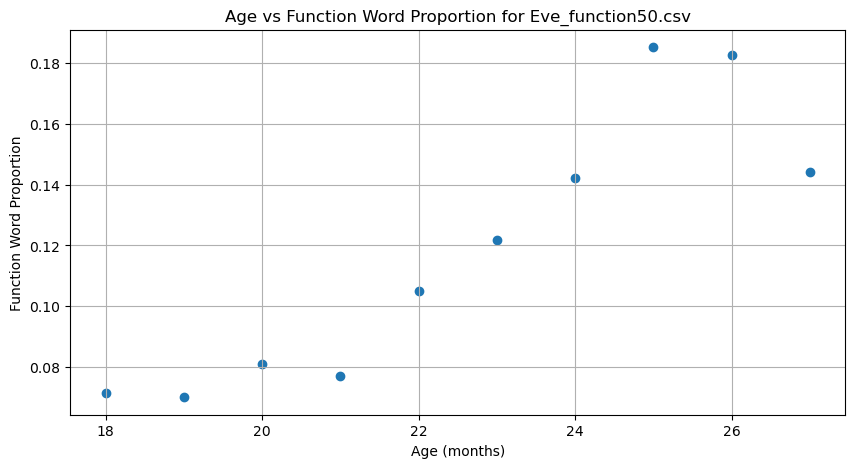

Spearman's rho for Eve_function50.csv: 0.9273

Chosen Transcripts for Eve_function50.csv: 
 ['010600a.ipcore.cex', '010700a.ipcore.cex', '010800.ipcore.cex', '010900a.ipcore.cex', '011000a.ipcore.cex', '011100a.ipcore.cex', '020000a.ipcore.cex', '020100a.ipcore.cex', '020200a.ipcore.cex', '020300a.ipcore.cex'] 

Function Word Proportions for Eve_function50.csv: 
 [0.07142857142857142, 0.07006369426751592, 0.08092485549132948, 0.07692307692307693, 0.105, 0.1218274111675127, 0.14224137931034483, 0.18518518518518517, 0.182648401826484, 0.1440329218106996] 

Ages for Eve_function50.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_function50.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



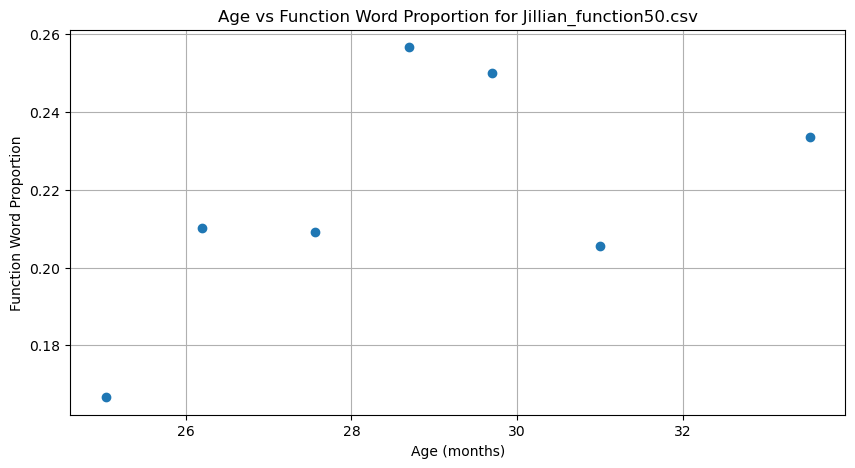

Spearman's rho for Jillian_function50.csv: 0.3929

Chosen Transcripts for Jillian_function50.csv: 
 ['020101.ipcore.cex', '020206.ipcore.cex', '020317.ipcore.cex', '020421.ipcore.cex', '020521.ipcore.cex', '020700.ipcore.cex', '020916.ipcore.cex'] 

Function Word Proportions for Jillian_function50.csv: 
 [0.16666666666666666, 0.21022727272727273, 0.20920502092050208, 0.25663716814159293, 0.25, 0.2056451612903226, 0.2336448598130841] 

Ages for Jillian_function50.csv: 
 [25.033333333333335, 26.2, 27.566666666666666, 28.7, 29.7, 31.0, 33.53333333333333] 

Time Steps for Jillian_function50.csv: 
 [1.1666666666666643, 1.3666666666666671, 1.1333333333333329, 1.0, 1.3000000000000007, 2.5333333333333314] 



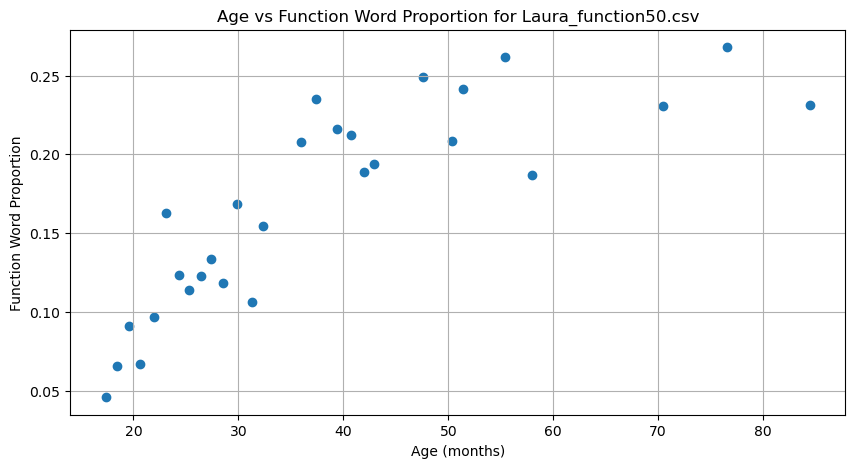

Spearman's rho for Laura_function50.csv: 0.8829

Chosen Transcripts for Laura_function50.csv: 
 ['010510.ipcore.cex', '010614a.ipcore.cex', '010717.ipcore.cex', '010819.ipcore.cex', '011000.ipcore.cex', '011103.ipcore.cex', '020010.ipcore.cex', '020110.ipcore.cex', '020212a.ipcore.cex', '020312.ipcore.cex', '020416.ipcore.cex', '020526.ipcore.cex', '020708.ipcore.cex', '020811.ipcore.cex', '030000.ipcore.cex', '030113.ipcore.cex', '030311.ipcore.cex', '030422.ipcore.cex', '030528a.ipcore.cex', '030628.ipcore.cex', '031117.ipcore.cex', '040211a.ipcore.cex', '040311a.ipcore.cex', '040711a.ipcore.cex', '041000.ipcore.cex', '051013.ipcore.cex', '060417.ipcore.cex', '070014.ipcore.cex'] 

Function Word Proportions for Laura_function50.csv: 
 [0.045871559633027525, 0.06557377049180328, 0.09090909090909091, 0.06666666666666667, 0.09655172413793103, 0.16279069767441862, 0.12352941176470589, 0.11398963730569948, 0.12258064516129032, 0.13333333333333333, 0.11805555555555555, 0.16842105263157894,

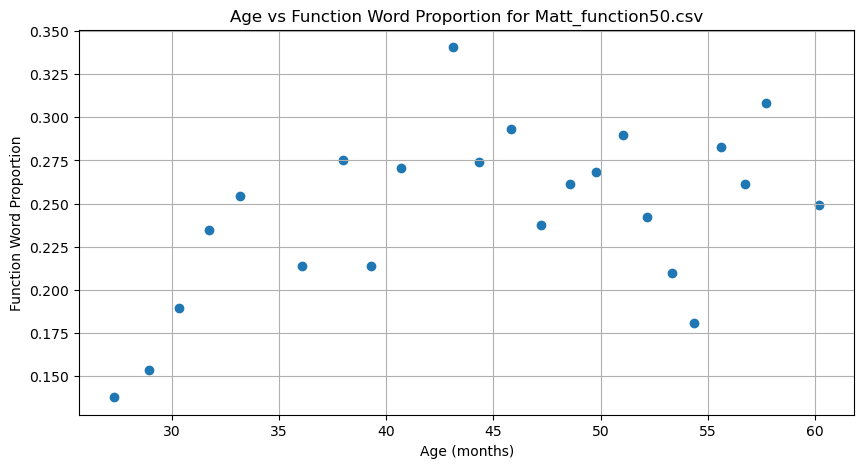

Spearman's rho for Matt_function50.csv: 0.3899

Chosen Transcripts for Matt_function50.csv: 
 ['020310.ipcore.cex', '020428.ipcore.cex', '020611.ipcore.cex', '020722.ipcore.cex', '020905.ipcore.cex', '030002.ipcore.cex', '030129.ipcore.cex', '030309.ipcore.cex', '030421.ipcore.cex', '030704.ipcore.cex', '030810.ipcore.cex', '030924.ipcore.cex', '031106.ipcore.cex', '040017.ipcore.cex', '040123.ipcore.cex', '040301.ipcore.cex', '040405.ipcore.cex', '040509.ipcore.cex', '040610.ipcore.cex', '040718.ipcore.cex', '040821.ipcore.cex', '040921.ipcore.cex', '050005.ipcore.cex'] 

Function Word Proportions for Matt_function50.csv: 
 [0.13793103448275862, 0.15384615384615385, 0.189873417721519, 0.2350230414746544, 0.25416666666666665, 0.2139917695473251, 0.27555555555555555, 0.21363636363636362, 0.27091633466135456, 0.34057971014492755, 0.27419354838709675, 0.2932692307692308, 0.23770491803278687, 0.2612244897959184, 0.26851851851851855, 0.2894736842105263, 0.2422907488986784, 0.210045662100456

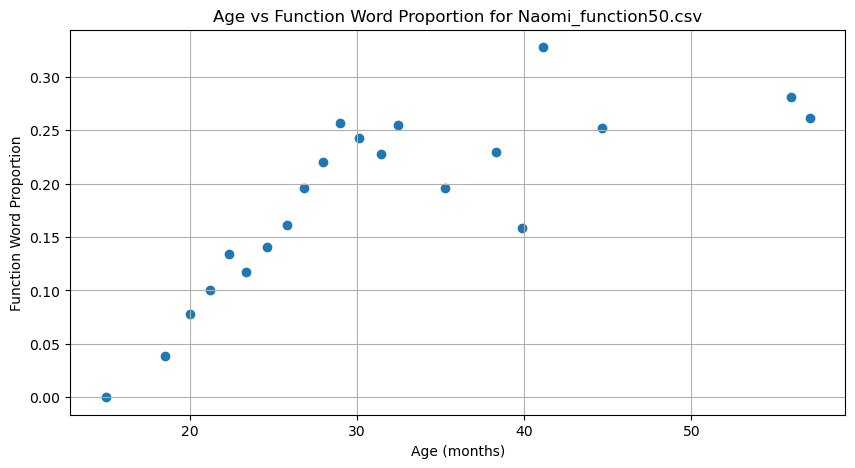

Spearman's rho for Naomi_function50.csv: 0.8714

Chosen Transcripts for Naomi_function50.csv: 
 ['010229.ipcore.cex', '010616.ipcore.cex', '010800.ipcore.cex', '010907.ipcore.cex', '011010a.ipcore.cex', '011111.ipcore.cex', '020018.ipcore.cex', '020125.ipcore.cex', '020225.ipcore.cex', '020329.ipcore.cex', '020430.ipcore.cex', '020604.ipcore.cex', '020713.ipcore.cex', '020814.ipcore.cex', '021108.ipcore.cex', '030210.ipcore.cex', '030326.ipcore.cex', '030503.ipcore.cex', '030819.ipcore.cex', '040728.ipcore.cex', '040903.ipcore.cex'] 

Function Word Proportions for Naomi_function50.csv: 
 [0.0, 0.038461538461538464, 0.0782608695652174, 0.1, 0.13380281690140844, 0.11764705882352941, 0.1402439024390244, 0.16091954022988506, 0.19597989949748743, 0.2205128205128205, 0.25663716814159293, 0.2426470588235294, 0.22807017543859648, 0.25510204081632654, 0.19617224880382775, 0.22966507177033493, 0.15813953488372093, 0.3278008298755187, 0.25217391304347825, 0.28112449799196787, 0.26126126126126126]

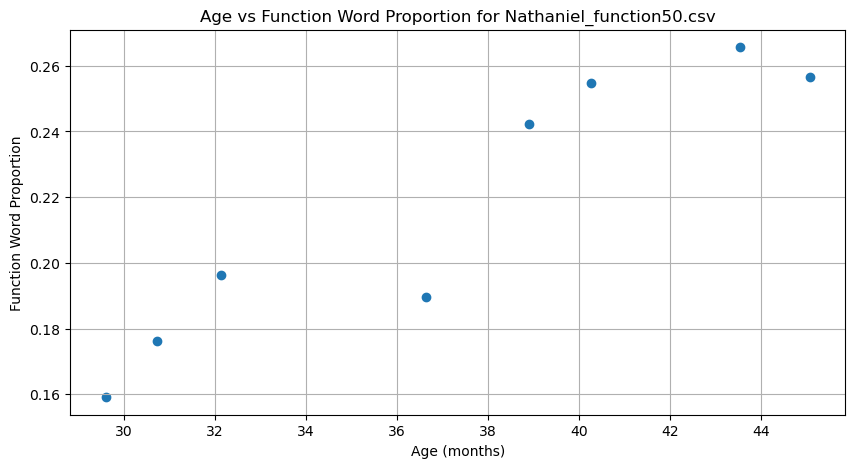

Spearman's rho for Nathaniel_function50.csv: 0.9524

Chosen Transcripts for Nathaniel_function50.csv: 
 ['020518a.ipcore.cex', '020622a.ipcore.cex', '020804a.ipcore.cex', '030019a.ipcore.cex', '030227a.ipcore.cex', '030408a.ipcore.cex', '030716.ipcore.cex', '030902.ipcore.cex'] 

Function Word Proportions for Nathaniel_function50.csv: 
 [0.1590909090909091, 0.1762114537444934, 0.19626168224299065, 0.18974358974358974, 0.24210526315789474, 0.2546816479400749, 0.265625, 0.2565217391304348] 

Ages for Nathaniel_function50.csv: 
 [29.6, 30.733333333333334, 32.13333333333333, 36.63333333333333, 38.9, 40.266666666666666, 43.53333333333333, 45.06666666666666] 

Time Steps for Nathaniel_function50.csv: 
 [1.1333333333333329, 1.3999999999999986, 4.5, 2.2666666666666657, 1.3666666666666671, 3.2666666666666657, 1.5333333333333314] 



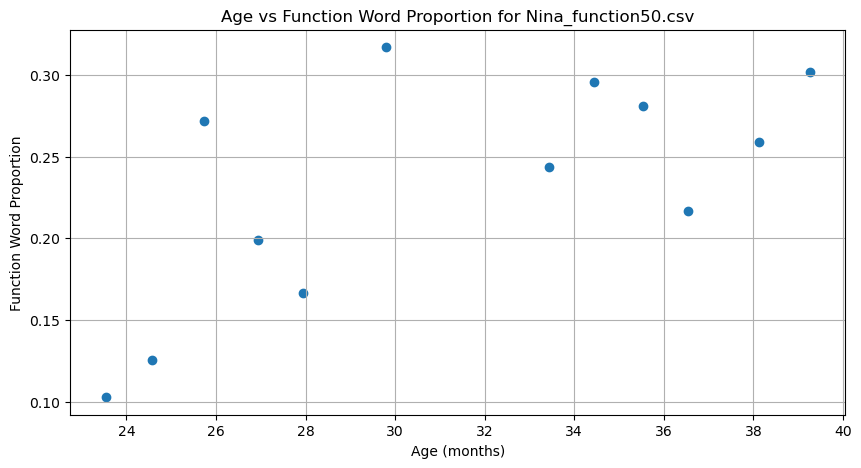

Spearman's rho for Nina_function50.csv: 0.6084

Chosen Transcripts for Nina_function50.csv: 
 ['011116.ipcore.cex', '020017.ipcore.cex', '020122.ipcore.cex', '020228.ipcore.cex', '020328.ipcore.cex', '020524.ipcore.cex', '020913.ipcore.cex', '021013.ipcore.cex', '021116.ipcore.cex', '030016.ipcore.cex', '030204.ipcore.cex', '030308.ipcore.cex'] 

Function Word Proportions for Nina_function50.csv: 
 [0.10273972602739725, 0.12582781456953643, 0.27155172413793105, 0.19909502262443438, 0.16666666666666666, 0.3169642857142857, 0.24352331606217617, 0.29596412556053814, 0.2809917355371901, 0.2170212765957447, 0.2590909090909091, 0.30158730158730157] 

Ages for Nina_function50.csv: 
 [23.53333333333333, 24.566666666666666, 25.733333333333334, 26.933333333333334, 27.933333333333334, 29.8, 33.43333333333334, 34.43333333333334, 35.53333333333333, 36.53333333333333, 38.13333333333333, 39.266666666666666] 

Time Steps for Nina_function50.csv: 
 [1.033333333333335, 1.1666666666666679, 1.199999999999

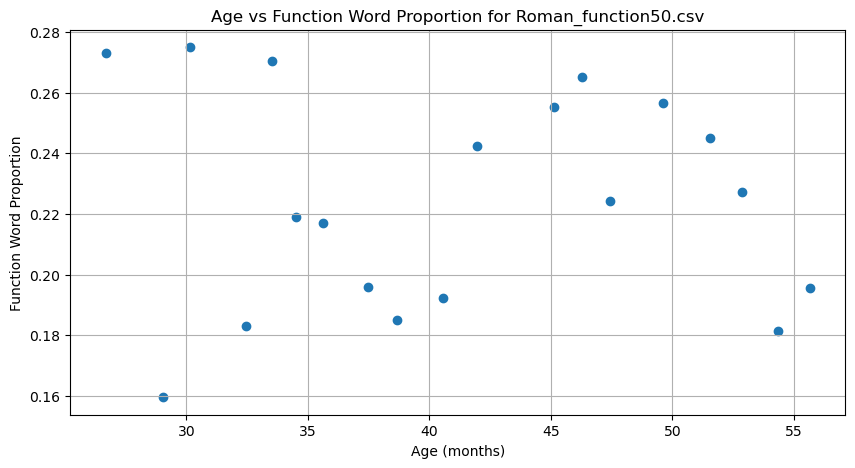

Spearman's rho for Roman_function50.csv: -0.0982

Chosen Transcripts for Roman_function50.csv: 
 ['020220.ipcore.cex', '020501.ipcore.cex', '020604.ipcore.cex', '020814.ipcore.cex', '020915.ipcore.cex', '021015.ipcore.cex', '021118.ipcore.cex', '030114.ipcore.cex', '030220.ipcore.cex', '030417.ipcore.cex', '030529.ipcore.cex', '030904.ipcore.cex', '031009.ipcore.cex', '031113.ipcore.cex', '040119.ipcore.cex', '040317.ipcore.cex', '040426.ipcore.cex', '040611.ipcore.cex', '040720.ipcore.cex'] 

Function Word Proportions for Roman_function50.csv: 
 [0.273224043715847, 0.15950920245398773, 0.275, 0.18316831683168316, 0.27058823529411763, 0.2190082644628099, 0.2169811320754717, 0.19572953736654805, 0.18490566037735848, 0.19215686274509805, 0.24242424242424243, 0.2554112554112554, 0.26523297491039427, 0.2242152466367713, 0.2565217391304348, 0.24489795918367346, 0.22709163346613545, 0.18137254901960784, 0.19555555555555557] 

Ages for Roman_function50.csv: 
 [26.666666666666668, 29.033333333

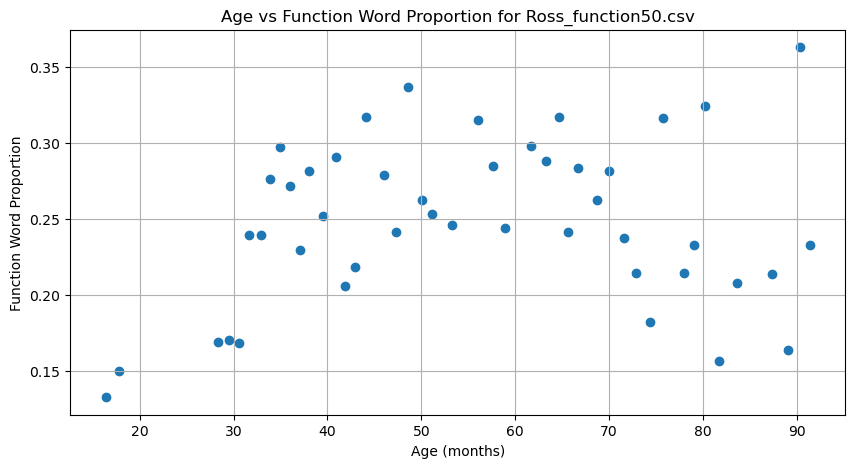

Spearman's rho for Ross_function50.csv: 0.1195

Chosen Transcripts for Ross_function50.csv: 
 ['010411a.ipcore.cex', '010523.ipcore.cex', '020409.ipcore.cex', '020514a.ipcore.cex', '020617a.ipcore.cex', '020718a.ipcore.cex', '020827a.ipcore.cex', '020928.ipcore.cex', '021100a.ipcore.cex', '030001a.ipcore.cex', '030101.ipcore.cex', '030202.ipcore.cex', '030315a.ipcore.cex', '030426a.ipcore.cex', '030526a.ipcore.cex', '030628.ipcore.cex', '030803a.ipcore.cex', '031001.ipcore.cex', '031109.ipcore.cex', '040019.ipcore.cex', '040201.ipcore.cex', '040305a.ipcore.cex', '040508a.ipcore.cex', '040800a.ipcore.cex', '040920a.ipcore.cex', '041027a.ipcore.cex', '050120a.ipcore.cex', '050309a.ipcore.cex', '050420a.ipcore.cex', '050520a.ipcore.cex', '050622a.ipcore.cex', '050820a.ipcore.cex', '051001a.ipcore.cex', '051117a.ipcore.cex', '060027b.ipcore.cex', '060211a1.ipcore.cex', '060323a.ipcore.cex', '060530a.ipcore.cex', '060701a.ipcore.cex', '060807a.ipcore.cex', '060922a.ipcore.cex', '061119a.ipc

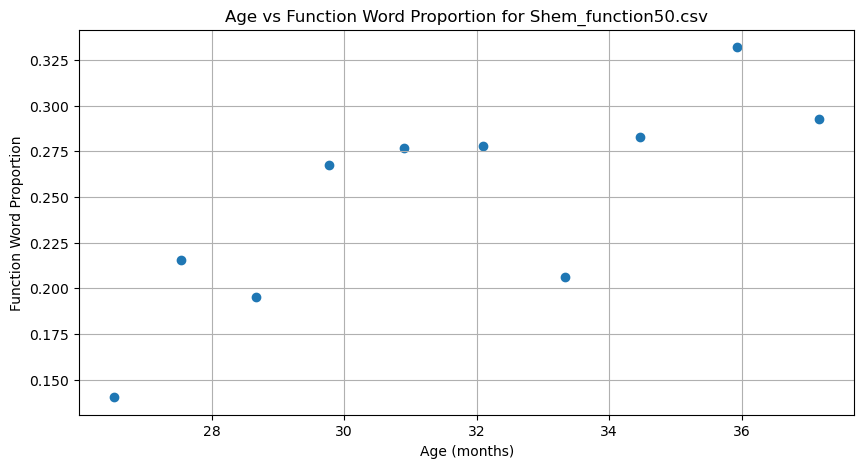

Spearman's rho for Shem_function50.csv: 0.8424

Chosen Transcripts for Shem_function50.csv: 
 ['020216.ipcore.cex', '020316.ipcore.cex', '020420.ipcore.cex', '020523.ipcore.cex', '020627.ipcore.cex', '020803.ipcore.cex', '020910.ipcore.cex', '021014.ipcore.cex', '021128.ipcore.cex', '030105.ipcore.cex'] 

Function Word Proportions for Shem_function50.csv: 
 [0.14035087719298245, 0.21559633027522937, 0.19523809523809524, 0.2674897119341564, 0.2766990291262136, 0.27802690582959644, 0.2062780269058296, 0.2826086956521739, 0.33201581027667987, 0.2926829268292683] 

Ages for Shem_function50.csv: 
 [26.53333333333333, 27.53333333333333, 28.666666666666668, 29.766666666666666, 30.9, 32.1, 33.333333333333336, 34.46666666666667, 35.93333333333334, 37.166666666666664] 

Time Steps for Shem_function50.csv: 
 [1.0, 1.1333333333333364, 1.0999999999999979, 1.1333333333333329, 1.2000000000000028, 1.2333333333333343, 1.1333333333333329, 1.4666666666666686, 1.2333333333333272] 



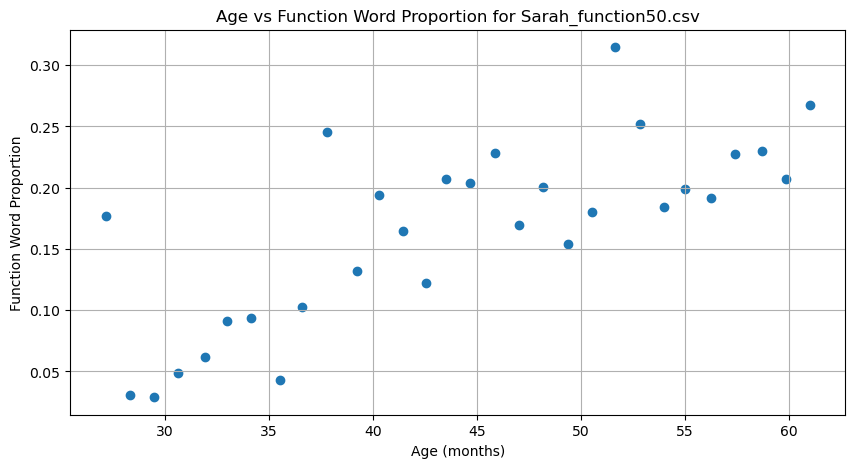

Spearman's rho for Sarah_function50.csv: 0.7375

Chosen Transcripts for Sarah_function50.csv: 
 ['020305.ipcore.cex', '020410.ipcore.cex', '020515.ipcore.cex', '020620.ipcore.cex', '020728.ipcore.cex', '020900.ipcore.cex', '021005.ipcore.cex', '021117.ipcore.cex', '030018a.ipcore.cex', '030124.ipcore.cex', '030307a.ipcore.cex', '030409.ipcore.cex', '030513.ipcore.cex', '030616.ipcore.cex', '030716.ipcore.cex', '030820.ipcore.cex', '030926a.ipcore.cex', '031030.ipcore.cex', '040005.ipcore.cex', '040111.ipcore.cex', '040216.ipcore.cex', '040319.ipcore.cex', '040425.ipcore.cex', '040529.ipcore.cex', '040700.ipcore.cex', '040807.ipcore.cex', '040912.ipcore.cex', '041021.ipcore.cex', '041126.ipcore.cex', '050030.ipcore.cex'] 

Function Word Proportions for Sarah_function50.csv: 
 [0.1773049645390071, 0.030534351145038167, 0.028985507246376812, 0.04861111111111111, 0.06206896551724138, 0.09090909090909091, 0.09340659340659341, 0.043209876543209874, 0.10294117647058823, 0.24553571428571427, 0

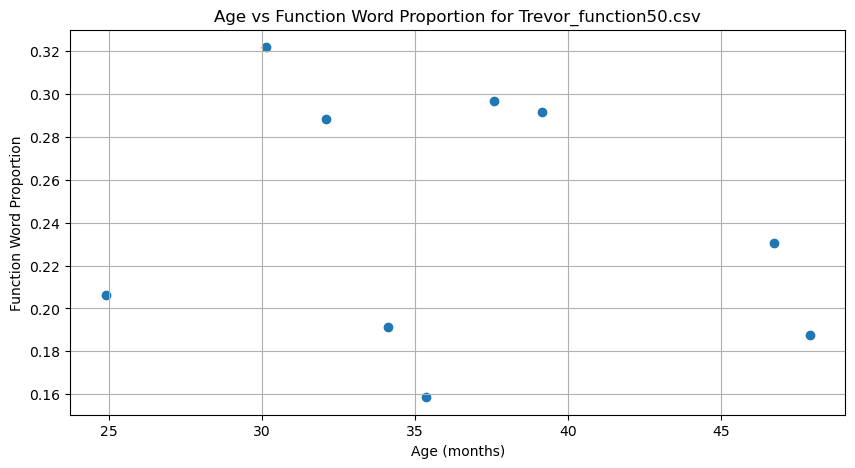

Spearman's rho for Trevor_function50.csv: -0.2167

Chosen Transcripts for Trevor_function50.csv: 
 ['020027.ipcore.cex', '020604.ipcore.cex', '020803.ipcore.cex', '021004.ipcore.cex', '021111.ipcore.cex', '030117.ipcore.cex', '030304.ipcore.cex', '031022.ipcore.cex', '031127a.ipcore.cex'] 

Function Word Proportions for Trevor_function50.csv: 
 [0.20642201834862386, 0.3218884120171674, 0.2886178861788618, 0.19130434782608696, 0.15859030837004406, 0.2967032967032967, 0.291497975708502, 0.23043478260869565, 0.18777292576419213] 

Ages for Trevor_function50.csv: 
 [24.9, 30.133333333333333, 32.1, 34.13333333333333, 35.36666666666667, 37.56666666666667, 39.13333333333333, 46.733333333333334, 47.9] 

Time Steps for Trevor_function50.csv: 
 [5.233333333333334, 1.9666666666666686, 2.0333333333333314, 1.2333333333333343, 2.200000000000003, 1.5666666666666629, 7.600000000000001, 1.1666666666666643] 



In [5]:
age_function_plots(function_files_50, spearman_rhos_50, age_files)

## Age vs Function Word Proportion (100 Utterances)

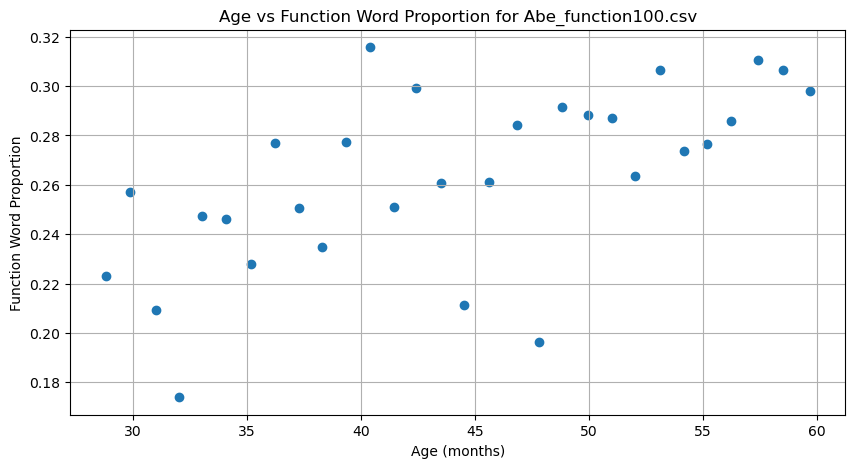

Spearman's rho for Abe_function100.csv: 0.6529

Chosen Transcripts for Abe_function100.csv: 
 ['020424.ipcore-100.cex', '020526.ipcore-100.cex', '020700.ipcore-100.cex', '020801.ipcore-100.cex', '020901.ipcore-100.cex', '021003.ipcore-100.cex', '021106.ipcore-100.cex', '030007.ipcore-100.cex', '030108.ipcore-100.cex', '030209.ipcore-100.cex', '030311.ipcore-100.cex', '030412.ipcore-100.cex', '030513.ipcore-100.cex', '030613.ipcore-100.cex', '030715.ipcore-100.cex', '030816.ipcore-100.cex', '030919.ipcore-100.cex', '031025.ipcore-100.cex', '031125.ipcore-100.cex', '040025.ipcore-100.cex', '040129.ipcore-100.cex', '040301.ipcore-100.cex', '040401.ipcore-100.cex', '040503.ipcore-100.cex', '040605.ipcore-100.cex', '040705.ipcore-100.cex', '040807.ipcore-100.cex', '040912.ipcore-100.cex', '041015.ipcore-100.cex', '041121.ipcore-100.cex'] 

Function Word Proportions for Abe_function100.csv: 
 [0.22317596566523606, 0.2572178477690289, 0.20930232558139536, 0.17399267399267399, 0.24721189591078

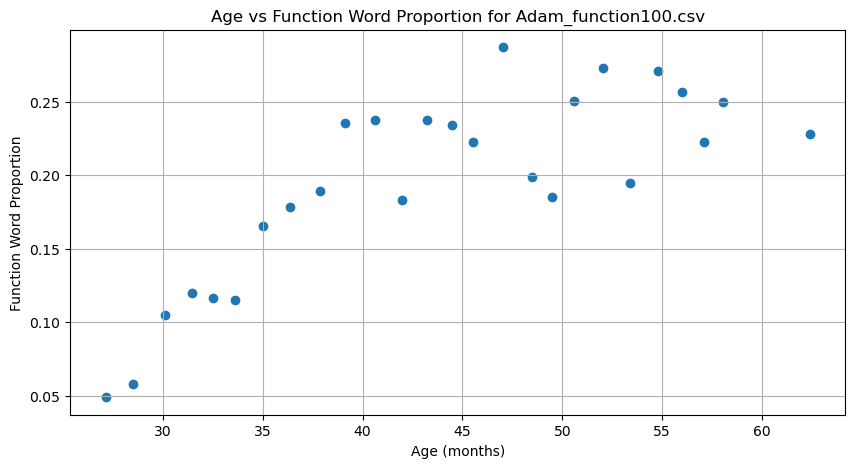

Spearman's rho for Adam_function100.csv: 0.7593

Chosen Transcripts for Adam_function100.csv: 
 ['020304.ipcore-100.cex', '020415.ipcore-100.cex', '020603.ipcore-100.cex', '020714.ipcore-100.cex', '020816.ipcore-100.cex', '020918.ipcore-100.cex', '021030.ipcore-100.cex', '030011.ipcore-100.cex', '030126.ipcore-100.cex', '030304.ipcore-100.cex', '030418.ipcore-100.cex', '030529.ipcore-100.cex', '030707.ipcore-100.cex', '030814.ipcore-100.cex', '030916.ipcore-100.cex', '031101.ipcore-100.cex', '040014.ipcore-100.cex', '040115.ipcore-100.cex', '040217.ipcore-100.cex', '040401.ipcore-100.cex', '040511.ipcore-100.cex', '040624.ipcore-100.cex', '040729.ipcore-100.cex', '040902.ipcore-100.cex', '041002.ipcore-100.cex', '050212.ipcore-100.cex'] 

Function Word Proportions for Adam_function100.csv: 
 [0.04892966360856269, 0.05802047781569966, 0.10465116279069768, 0.11965811965811966, 0.11661807580174927, 0.11528150134048257, 0.16507177033492823, 0.17814726840855108, 0.18888888888888888, 0.23516

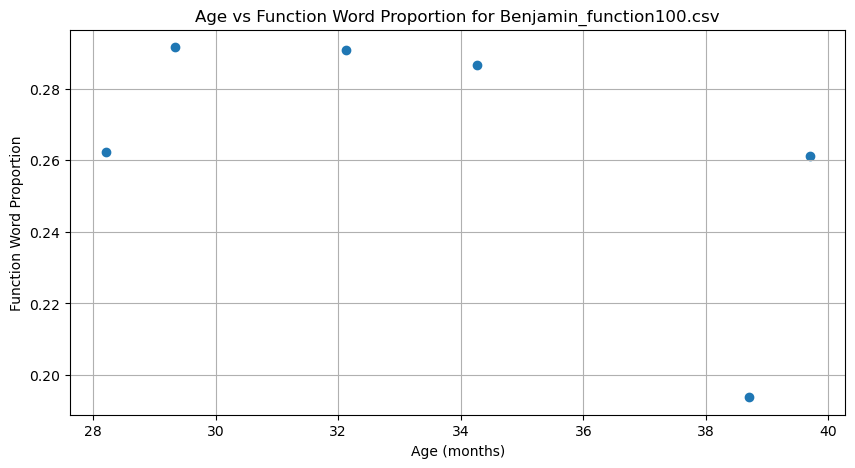

Spearman's rho for Benjamin_function100.csv: -0.6000

Chosen Transcripts for Benjamin_function100.csv: 
 ['020406.ipcore-100.cex', '020510.ipcore-100.cex', '020804.ipcore-100.cex', '021008.ipcore-100.cex', '030221.ipcore-100.cex', '030321.ipcore-100.cex'] 

Function Word Proportions for Benjamin_function100.csv: 
 [0.2621951219512195, 0.29158512720156554, 0.29069767441860467, 0.28650646950092423, 0.19381443298969073, 0.26119402985074625] 

Ages for Benjamin_function100.csv: 
 [28.2, 29.333333333333332, 32.13333333333333, 34.266666666666666, 38.7, 39.7] 

Time Steps for Benjamin_function100.csv: 
 [1.1333333333333329, 2.8000000000000007, 2.133333333333333, 4.433333333333337, 1.0] 



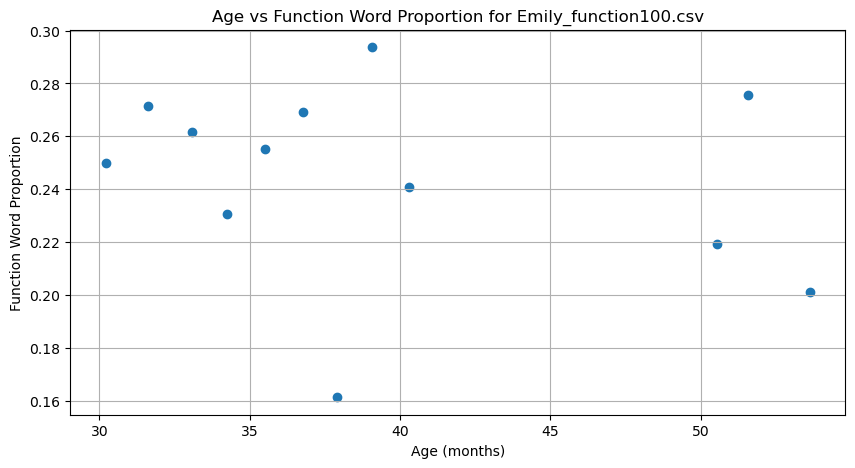

Spearman's rho for Emily_function100.csv: -0.2028

Chosen Transcripts for Emily_function100.csv: 
 ['020606.ipcore-100.cex', '020718.ipcore-100.cex', '020902.ipcore-100.cex', '021007.ipcore-100.cex', '021115.ipcore-100.cex', '030023.ipcore-100.cex', '030127.ipcore-100.cex', '030302.ipcore-100.cex', '030409.ipcore-100.cex', '040216.ipcore-100.cex', '040317.ipcore-100.cex', '040519.ipcore-100.cex'] 

Function Word Proportions for Emily_function100.csv: 
 [0.25, 0.27157894736842103, 0.2616487455197133, 0.23076923076923078, 0.25508317929759705, 0.26907630522088355, 0.1613588110403397, 0.2936936936936937, 0.24084778420038536, 0.21940928270042195, 0.2755741127348643, 0.2013129102844639] 

Ages for Emily_function100.csv: 
 [30.2, 31.6, 33.06666666666666, 34.233333333333334, 35.5, 36.766666666666666, 37.9, 39.06666666666667, 40.3, 50.53333333333333, 51.56666666666666, 53.63333333333333] 

Time Steps for Emily_function100.csv: 
 [1.4000000000000021, 1.4666666666666615, 1.1666666666666714, 1.266

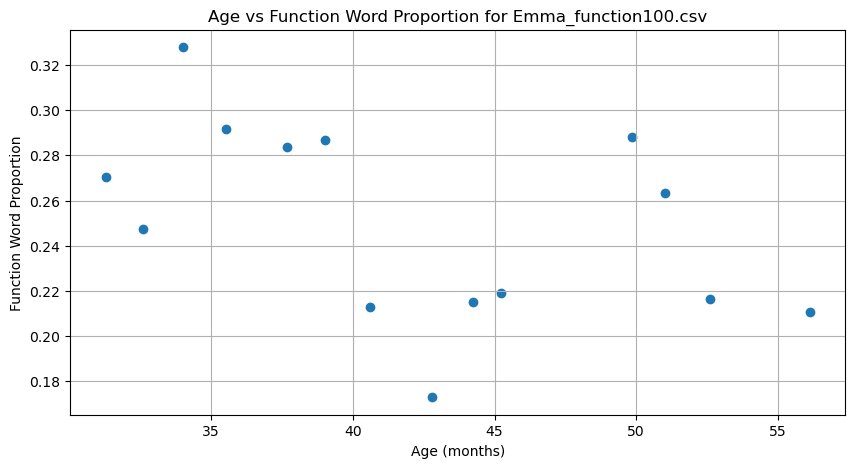

Spearman's rho for Emma_function100.csv: -0.4769

Chosen Transcripts for Emma_function100.csv: 
 ['020708.ipcore-100.cex', '020818.ipcore-100.cex', '021000.ipcore-100.cex', '021116.ipcore-100.cex', '030120.ipcore-100.cex', '030300.ipcore-100.cex', '030418.ipcore-100.cex', '030624.ipcore-100.cex', '030807.ipcore-100.cex', '030907.ipcore-100.cex', '040125.ipcore-100.cex', '040300.ipcore-100.cex', '040418.ipcore-100.cex', '040804.ipcore-100.cex'] 

Function Word Proportions for Emma_function100.csv: 
 [0.270509977827051, 0.24733475479744135, 0.32786885245901637, 0.2918287937743191, 0.2838827838827839, 0.28662420382165604, 0.2128146453089245, 0.17289719626168223, 0.2150313152400835, 0.21893491124260356, 0.288135593220339, 0.26346153846153847, 0.2165991902834008, 0.21052631578947367] 

Ages for Emma_function100.csv: 
 [31.266666666666666, 32.6, 34.0, 35.53333333333333, 37.666666666666664, 39.0, 40.6, 42.8, 44.233333333333334, 45.233333333333334, 49.833333333333336, 51.0, 52.6, 56.1333333333

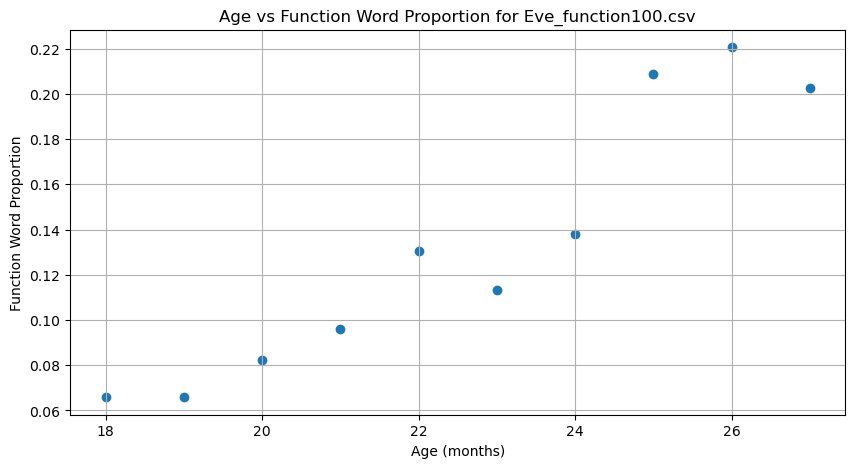

Spearman's rho for Eve_function100.csv: 0.9394

Chosen Transcripts for Eve_function100.csv: 
 ['010600a.ipcore-100.cex', '010700a.ipcore-100.cex', '010800.ipcore-100.cex', '010900a.ipcore-100.cex', '011000a.ipcore-100.cex', '011100a.ipcore-100.cex', '020000a.ipcore-100.cex', '020100a.ipcore-100.cex', '020200a.ipcore-100.cex', '020300a.ipcore-100.cex'] 

Function Word Proportions for Eve_function100.csv: 
 [0.06589147286821706, 0.06583072100313479, 0.08211143695014662, 0.096045197740113, 0.1306532663316583, 0.11335012594458438, 0.1382488479262673, 0.2087912087912088, 0.22065727699530516, 0.2028397565922921] 

Ages for Eve_function100.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_function100.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



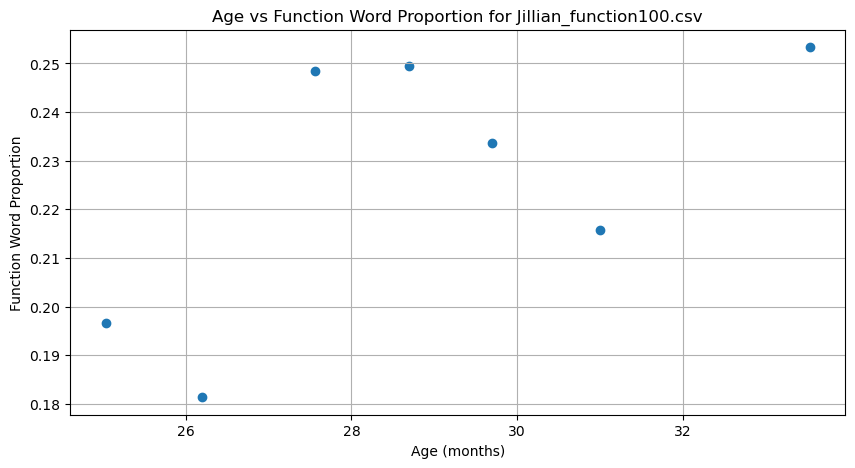

Spearman's rho for Jillian_function100.csv: 0.6429

Chosen Transcripts for Jillian_function100.csv: 
 ['020101.ipcore-100.cex', '020206.ipcore-100.cex', '020317.ipcore-100.cex', '020421.ipcore-100.cex', '020521.ipcore-100.cex', '020700.ipcore-100.cex', '020916.ipcore-100.cex'] 

Function Word Proportions for Jillian_function100.csv: 
 [0.19656019656019655, 0.18134715025906736, 0.24853228962818003, 0.24949698189134809, 0.2336244541484716, 0.21568627450980393, 0.25333333333333335] 

Ages for Jillian_function100.csv: 
 [25.033333333333335, 26.2, 27.566666666666666, 28.7, 29.7, 31.0, 33.53333333333333] 

Time Steps for Jillian_function100.csv: 
 [1.1666666666666643, 1.3666666666666671, 1.1333333333333329, 1.0, 1.3000000000000007, 2.5333333333333314] 



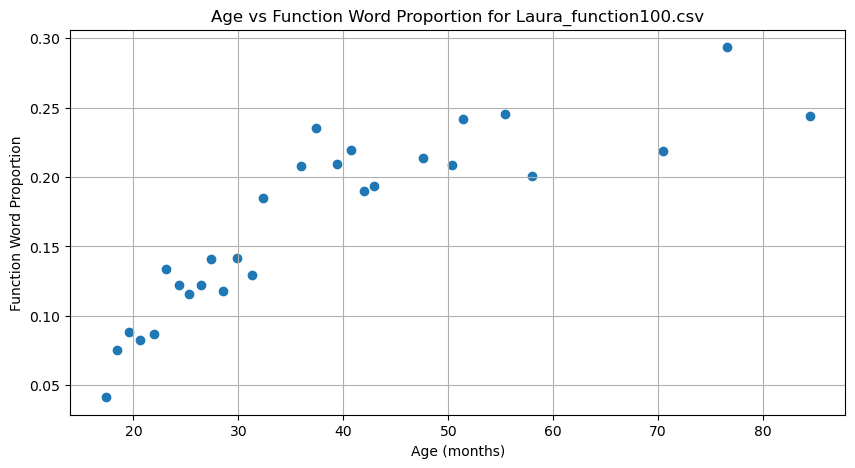

Spearman's rho for Laura_function100.csv: 0.9146

Chosen Transcripts for Laura_function100.csv: 
 ['010510.ipcore-100.cex', '010614a.ipcore-100.cex', '010717.ipcore-100.cex', '010819.ipcore-100.cex', '011000.ipcore-100.cex', '011103.ipcore-100.cex', '020010.ipcore-100.cex', '020110.ipcore-100.cex', '020212a.ipcore-100.cex', '020312.ipcore-100.cex', '020416.ipcore-100.cex', '020526.ipcore-100.cex', '020708.ipcore-100.cex', '020811.ipcore-100.cex', '030000.ipcore-100.cex', '030113.ipcore-100.cex', '030311.ipcore-100.cex', '030422.ipcore-100.cex', '030528a.ipcore-100.cex', '030628.ipcore-100.cex', '031117.ipcore-100.cex', '040211a.ipcore-100.cex', '040311a.ipcore-100.cex', '040711a.ipcore-100.cex', '041000.ipcore-100.cex', '051013.ipcore-100.cex', '060417.ipcore-100.cex', '070014.ipcore-100.cex'] 

Function Word Proportions for Laura_function100.csv: 
 [0.04145077720207254, 0.07534246575342465, 0.08823529411764706, 0.08275862068965517, 0.08717948717948718, 0.13353115727002968, 0.122448979

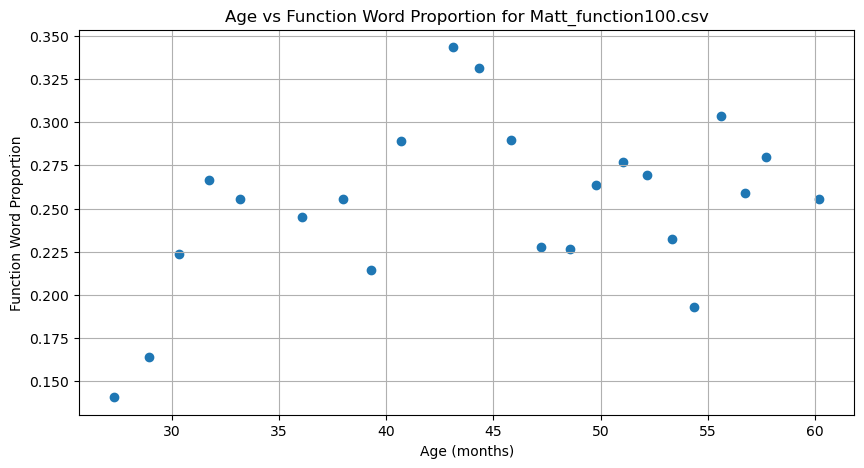

Spearman's rho for Matt_function100.csv: 0.3192

Chosen Transcripts for Matt_function100.csv: 
 ['020310.ipcore-100.cex', '020428.ipcore-100.cex', '020611.ipcore-100.cex', '020722.ipcore-100.cex', '020905.ipcore-100.cex', '030002.ipcore-100.cex', '030129.ipcore-100.cex', '030309.ipcore-100.cex', '030421.ipcore-100.cex', '030704.ipcore-100.cex', '030810.ipcore-100.cex', '030924.ipcore-100.cex', '031106.ipcore-100.cex', '040017.ipcore-100.cex', '040123.ipcore-100.cex', '040301.ipcore-100.cex', '040405.ipcore-100.cex', '040509.ipcore-100.cex', '040610.ipcore-100.cex', '040718.ipcore-100.cex', '040821.ipcore-100.cex', '040921.ipcore-100.cex', '050005.ipcore-100.cex'] 

Function Word Proportions for Matt_function100.csv: 
 [0.1407185628742515, 0.163727959697733, 0.22388059701492538, 0.2663755458515284, 0.25571725571725573, 0.245136186770428, 0.25565610859728505, 0.214123006833713, 0.28937007874015747, 0.3433962264150943, 0.3313953488372093, 0.2895927601809955, 0.22755741127348644, 0.2266666

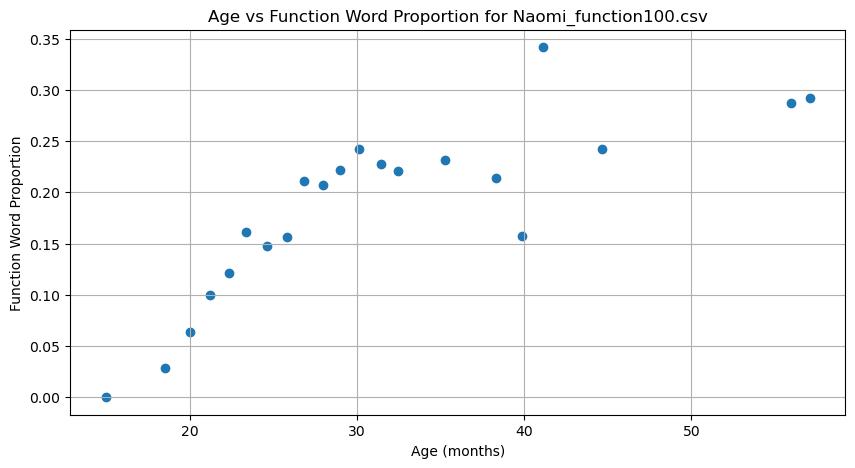

Spearman's rho for Naomi_function100.csv: 0.8844

Chosen Transcripts for Naomi_function100.csv: 
 ['010229.ipcore-100.cex', '010616.ipcore-100.cex', '010800.ipcore-100.cex', '010907.ipcore-100.cex', '011010a.ipcore-100.cex', '011111.ipcore-100.cex', '020018.ipcore-100.cex', '020125.ipcore-100.cex', '020225.ipcore-100.cex', '020329.ipcore-100.cex', '020430.ipcore-100.cex', '020604.ipcore-100.cex', '020713.ipcore-100.cex', '020814.ipcore-100.cex', '021108.ipcore-100.cex', '030210.ipcore-100.cex', '030326.ipcore-100.cex', '030503.ipcore-100.cex', '030819.ipcore-100.cex', '040728.ipcore-100.cex', '040903.ipcore-100.cex'] 

Function Word Proportions for Naomi_function100.csv: 
 [0.0, 0.028225806451612902, 0.0641025641025641, 0.1, 0.12162162162162163, 0.16151202749140894, 0.14792899408284024, 0.1563517915309446, 0.2113022113022113, 0.20675105485232068, 0.22197802197802197, 0.2426470588235294, 0.22807017543859648, 0.22062350119904076, 0.2315035799522673, 0.21345707656612528, 0.157024793388429

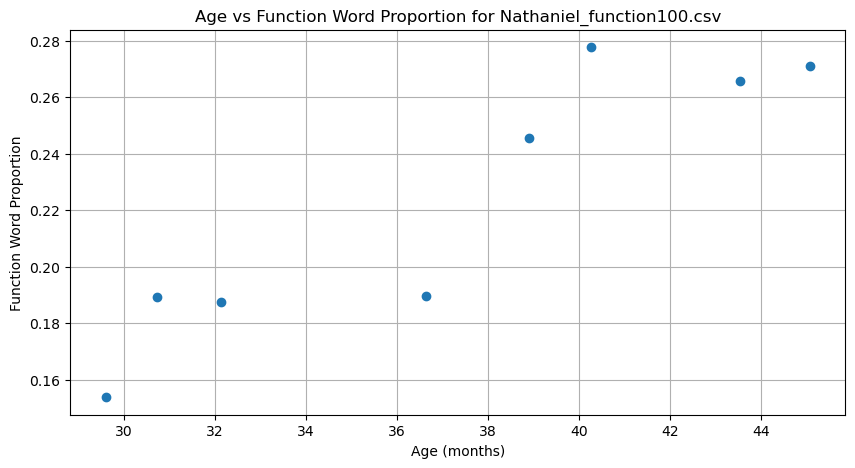

Spearman's rho for Nathaniel_function100.csv: 0.9048

Chosen Transcripts for Nathaniel_function100.csv: 
 ['020518a.ipcore-100.cex', '020622a.ipcore-100.cex', '020804a.ipcore-100.cex', '030019a.ipcore-100.cex', '030227a.ipcore-100.cex', '030408a.ipcore-100.cex', '030716.ipcore-100.cex', '030902.ipcore-100.cex'] 

Function Word Proportions for Nathaniel_function100.csv: 
 [0.15384615384615385, 0.1891891891891892, 0.1875, 0.18974358974358974, 0.24561403508771928, 0.2776617954070981, 0.265625, 0.27102803738317754] 

Ages for Nathaniel_function100.csv: 
 [29.6, 30.733333333333334, 32.13333333333333, 36.63333333333333, 38.9, 40.266666666666666, 43.53333333333333, 45.06666666666666] 

Time Steps for Nathaniel_function100.csv: 
 [1.1333333333333329, 1.3999999999999986, 4.5, 2.2666666666666657, 1.3666666666666671, 3.2666666666666657, 1.5333333333333314] 



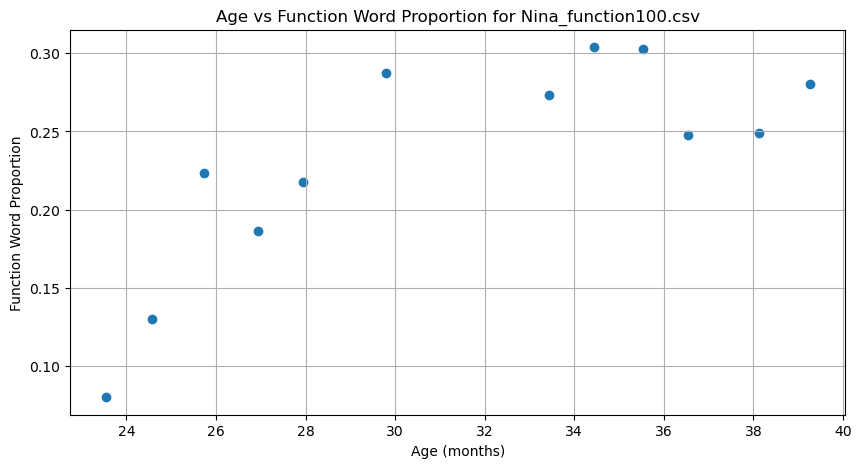

Spearman's rho for Nina_function100.csv: 0.7063

Chosen Transcripts for Nina_function100.csv: 
 ['011116.ipcore-100.cex', '020017.ipcore-100.cex', '020122.ipcore-100.cex', '020228.ipcore-100.cex', '020328.ipcore-100.cex', '020524.ipcore-100.cex', '020913.ipcore-100.cex', '021013.ipcore-100.cex', '021116.ipcore-100.cex', '030016.ipcore-100.cex', '030204.ipcore-100.cex', '030308.ipcore-100.cex'] 

Function Word Proportions for Nina_function100.csv: 
 [0.0802675585284281, 0.13043478260869565, 0.2235294117647059, 0.18636363636363637, 0.21784232365145229, 0.28708133971291866, 0.27341772151898736, 0.30376940133037694, 0.302713987473904, 0.24791666666666667, 0.24891774891774893, 0.28007889546351084] 

Ages for Nina_function100.csv: 
 [23.53333333333333, 24.566666666666666, 25.733333333333334, 26.933333333333334, 27.933333333333334, 29.8, 33.43333333333334, 34.43333333333334, 35.53333333333333, 36.53333333333333, 38.13333333333333, 39.266666666666666] 

Time Steps for Nina_function100.csv: 
 [

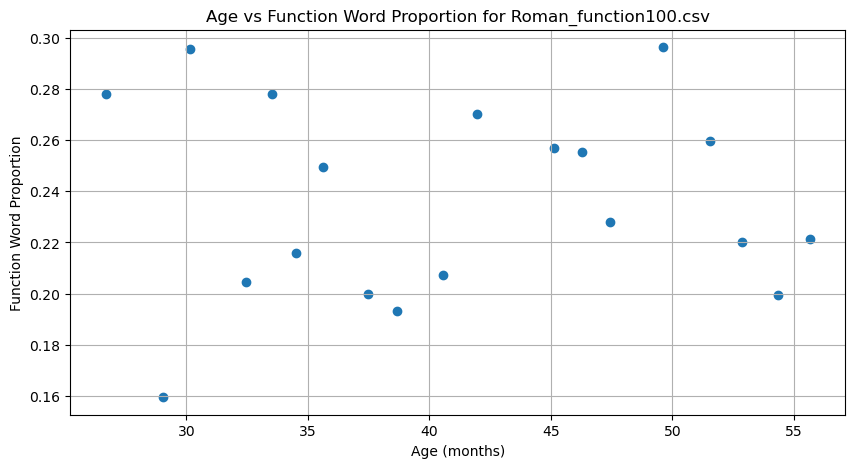

Spearman's rho for Roman_function100.csv: -0.0193

Chosen Transcripts for Roman_function100.csv: 
 ['020220.ipcore-100.cex', '020501.ipcore-100.cex', '020604.ipcore-100.cex', '020814.ipcore-100.cex', '020915.ipcore-100.cex', '021015.ipcore-100.cex', '021118.ipcore-100.cex', '030114.ipcore-100.cex', '030220.ipcore-100.cex', '030417.ipcore-100.cex', '030529.ipcore-100.cex', '030904.ipcore-100.cex', '031009.ipcore-100.cex', '031113.ipcore-100.cex', '040119.ipcore-100.cex', '040317.ipcore-100.cex', '040426.ipcore-100.cex', '040611.ipcore-100.cex', '040720.ipcore-100.cex'] 

Function Word Proportions for Roman_function100.csv: 
 [0.2779220779220779, 0.15950920245398773, 0.29577464788732394, 0.20470588235294118, 0.27788649706457924, 0.2159827213822894, 0.24947589098532494, 0.2, 0.1931166347992352, 0.2072936660268714, 0.27007299270072993, 0.25675675675675674, 0.2552083333333333, 0.22784810126582278, 0.2962962962962963, 0.2595419847328244, 0.2202020202020202, 0.19951338199513383, 0.22121896162

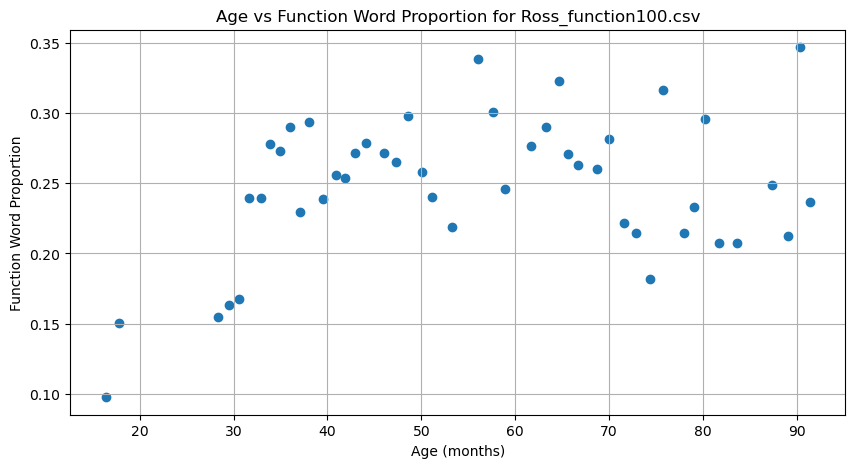

Spearman's rho for Ross_function100.csv: 0.1424

Chosen Transcripts for Ross_function100.csv: 
 ['010411a.ipcore-100.cex', '010523.ipcore-100.cex', '020409.ipcore-100.cex', '020514a.ipcore-100.cex', '020617a.ipcore-100.cex', '020718a.ipcore-100.cex', '020827a.ipcore-100.cex', '020928.ipcore-100.cex', '021100a.ipcore-100.cex', '030001a.ipcore-100.cex', '030101.ipcore-100.cex', '030202.ipcore-100.cex', '030315a.ipcore-100.cex', '030426a.ipcore-100.cex', '030526a.ipcore-100.cex', '030628.ipcore-100.cex', '030803a.ipcore-100.cex', '031001.ipcore-100.cex', '031109.ipcore-100.cex', '040019.ipcore-100.cex', '040201.ipcore-100.cex', '040305a.ipcore-100.cex', '040508a.ipcore-100.cex', '040800a.ipcore-100.cex', '040920a.ipcore-100.cex', '041027a.ipcore-100.cex', '050120a.ipcore-100.cex', '050309a.ipcore-100.cex', '050420a.ipcore-100.cex', '050520a.ipcore-100.cex', '050622a.ipcore-100.cex', '050820a.ipcore-100.cex', '051001a.ipcore-100.cex', '051117a.ipcore-100.cex', '060027b.ipcore-100.cex', '06

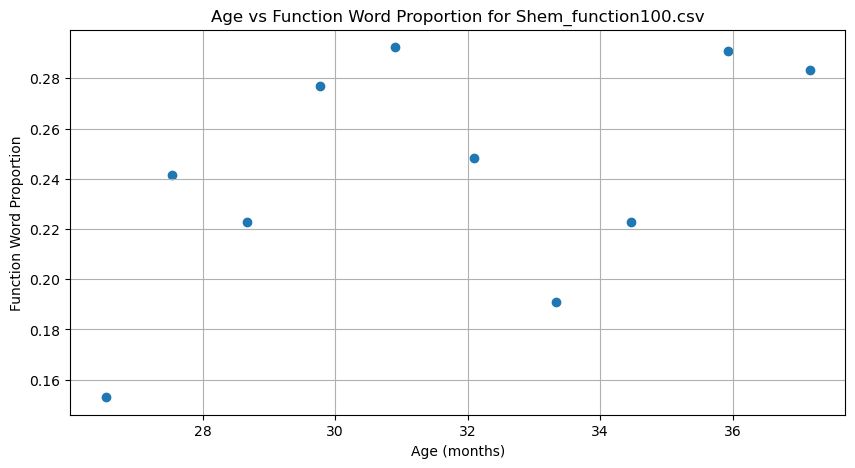

Spearman's rho for Shem_function100.csv: 0.4667

Chosen Transcripts for Shem_function100.csv: 
 ['020216.ipcore-100.cex', '020316.ipcore-100.cex', '020420.ipcore-100.cex', '020523.ipcore-100.cex', '020627.ipcore-100.cex', '020803.ipcore-100.cex', '020910.ipcore-100.cex', '021014.ipcore-100.cex', '021128.ipcore-100.cex', '030105.ipcore-100.cex'] 

Function Word Proportions for Shem_function100.csv: 
 [0.15300546448087432, 0.24145785876993167, 0.22270742358078602, 0.27708333333333335, 0.29238329238329236, 0.2484472049689441, 0.1910828025477707, 0.22273781902552203, 0.29080675422138835, 0.28313253012048195] 

Ages for Shem_function100.csv: 
 [26.53333333333333, 27.53333333333333, 28.666666666666668, 29.766666666666666, 30.9, 32.1, 33.333333333333336, 34.46666666666667, 35.93333333333334, 37.166666666666664] 

Time Steps for Shem_function100.csv: 
 [1.0, 1.1333333333333364, 1.0999999999999979, 1.1333333333333329, 1.2000000000000028, 1.2333333333333343, 1.1333333333333329, 1.466666666666668

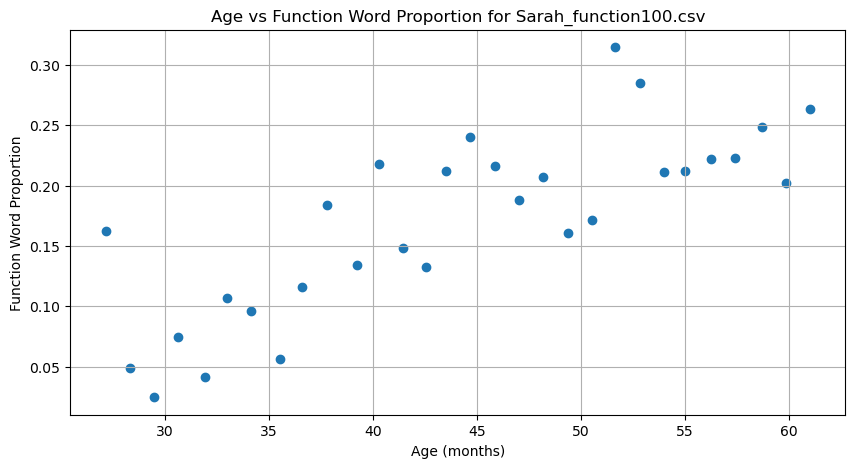

Spearman's rho for Sarah_function100.csv: 0.7953

Chosen Transcripts for Sarah_function100.csv: 
 ['020305.ipcore-100.cex', '020410.ipcore-100.cex', '020515.ipcore-100.cex', '020620.ipcore-100.cex', '020728.ipcore-100.cex', '020900.ipcore-100.cex', '021005.ipcore-100.cex', '021117.ipcore-100.cex', '030018a.ipcore-100.cex', '030124.ipcore-100.cex', '030307a.ipcore-100.cex', '030409.ipcore-100.cex', '030513.ipcore-100.cex', '030616.ipcore-100.cex', '030716.ipcore-100.cex', '030820.ipcore-100.cex', '030926a.ipcore-100.cex', '031030.ipcore-100.cex', '040005.ipcore-100.cex', '040111.ipcore-100.cex', '040216.ipcore-100.cex', '040319.ipcore-100.cex', '040425.ipcore-100.cex', '040529.ipcore-100.cex', '040700.ipcore-100.cex', '040807.ipcore-100.cex', '040912.ipcore-100.cex', '041021.ipcore-100.cex', '041126.ipcore-100.cex', '050030.ipcore-100.cex'] 

Function Word Proportions for Sarah_function100.csv: 
 [0.16201117318435754, 0.048507462686567165, 0.02456140350877193, 0.07432432432432433, 0.041

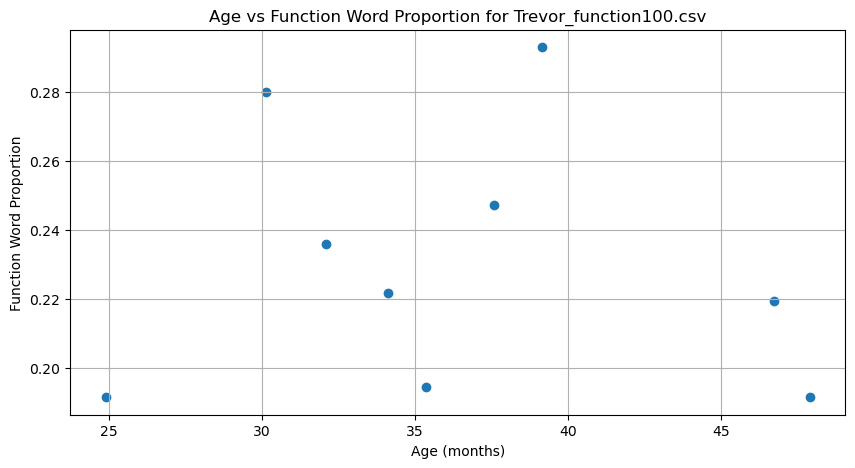

Spearman's rho for Trevor_function100.csv: 0.0000

Chosen Transcripts for Trevor_function100.csv: 
 ['020027.ipcore-100.cex', '020604.ipcore-100.cex', '020803.ipcore-100.cex', '021004.ipcore-100.cex', '021111.ipcore-100.cex', '030117.ipcore-100.cex', '030304.ipcore-100.cex', '031022.ipcore-100.cex', '031127a.ipcore-100.cex'] 

Function Word Proportions for Trevor_function100.csv: 
 [0.1915367483296214, 0.28, 0.23593073593073594, 0.2217741935483871, 0.19438444924406048, 0.24721189591078066, 0.29306930693069305, 0.21956521739130436, 0.19157894736842104] 

Ages for Trevor_function100.csv: 
 [24.9, 30.133333333333333, 32.1, 34.13333333333333, 35.36666666666667, 37.56666666666667, 39.13333333333333, 46.733333333333334, 47.9] 

Time Steps for Trevor_function100.csv: 
 [5.233333333333334, 1.9666666666666686, 2.0333333333333314, 1.2333333333333343, 2.200000000000003, 1.5666666666666629, 7.600000000000001, 1.1666666666666643] 



In [6]:
age_function_plots(function_files_100, spearman_rhos_100, age_files)

## Age vs Function Word Proportion (All Utterances)

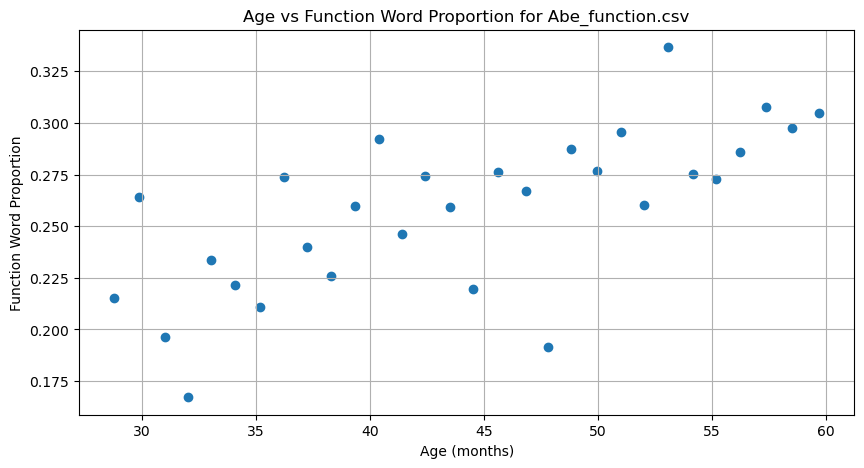

Spearman's rho for Abe_function.csv: 0.7273

Chosen Transcripts for Abe_function.csv: 
 ['020424.cha', '020526.cha', '020700.cha', '020801.cha', '020901.cha', '021003.cha', '021106.cha', '030007.cha', '030108.cha', '030209.cha', '030311.cha', '030412.cha', '030513.cha', '030613.cha', '030715.cha', '030816.cha', '030919.cha', '031025.cha', '031125.cha', '040025.cha', '040129.cha', '040301.cha', '040401.cha', '040503.cha', '040605.cha', '040705.cha', '040807.cha', '040912.cha', '041015.cha', '041121.cha'] 

Function Word Proportions for Abe_function.csv: 
 [0.2151394422310757, 0.2641509433962264, 0.1963302752293578, 0.16722408026755853, 0.23375, 0.2214765100671141, 0.21073170731707316, 0.27385892116182575, 0.24008350730688935, 0.2259294566253575, 0.2598814229249012, 0.2920353982300885, 0.24604141291108406, 0.27440147329650094, 0.2593703148425787, 0.21961620469083157, 0.276218611521418, 0.26702269692923897, 0.19133034379671152, 0.28753541076487255, 0.2765957446808511, 0.2957575757575758, 

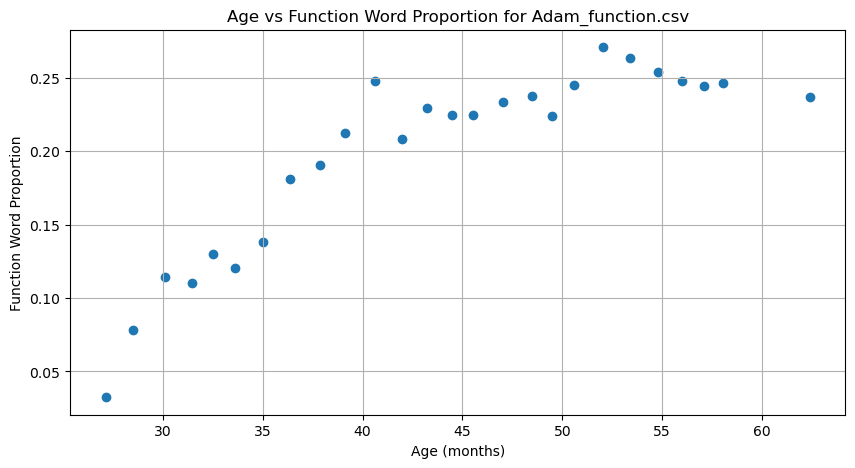

Spearman's rho for Adam_function.csv: 0.8790

Chosen Transcripts for Adam_function.csv: 
 ['020304.cha', '020415.cha', '020603.cha', '020714.cha', '020816.cha', '020918.cha', '021030.cha', '030011.cha', '030126.cha', '030304.cha', '030418.cha', '030529.cha', '030707.cha', '030814.cha', '030916.cha', '031101.cha', '040014.cha', '040115.cha', '040217.cha', '040401.cha', '040511.cha', '040624.cha', '040729.cha', '040902.cha', '041002.cha', '050212.cha'] 

Function Word Proportions for Adam_function.csv: 
 [0.03245591617684641, 0.07789855072463768, 0.11408083441981746, 0.11033478893740903, 0.1300116776956014, 0.1205955334987593, 0.13800236406619384, 0.181287861790442, 0.19060177415487892, 0.21254011355220934, 0.247529525186792, 0.20848422141748577, 0.22958057395143489, 0.2246858832224686, 0.2244402481791206, 0.2337622549019608, 0.23735212685627988, 0.2238478419897586, 0.2453102453102453, 0.27079107505070993, 0.2635396518375242, 0.2538970745248772, 0.24796195652173914, 0.24454783367257923, 

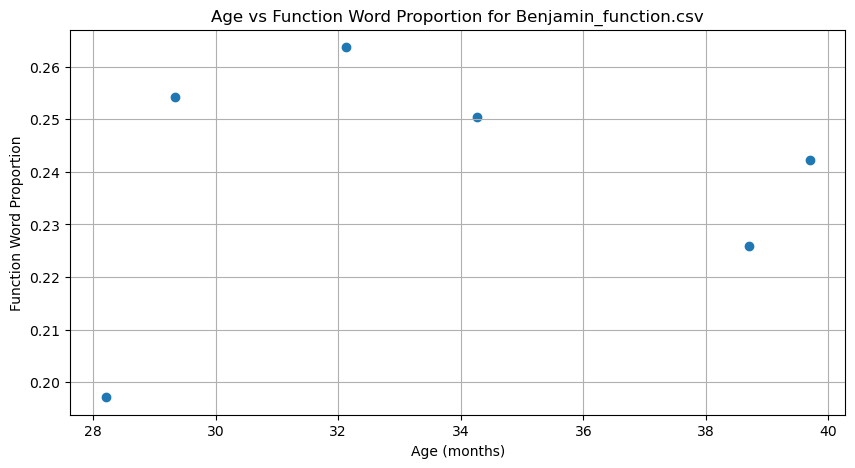

Spearman's rho for Benjamin_function.csv: -0.0286

Chosen Transcripts for Benjamin_function.csv: 
 ['020406.cha', '020510.cha', '020804.cha', '021008.cha', '030221.cha', '030321.cha'] 

Function Word Proportions for Benjamin_function.csv: 
 [0.1971326164874552, 0.25424929178470257, 0.2637231503579952, 0.2504398826979472, 0.22593800978792822, 0.2422360248447205] 

Ages for Benjamin_function.csv: 
 [28.2, 29.333333333333332, 32.13333333333333, 34.266666666666666, 38.7, 39.7] 

Time Steps for Benjamin_function.csv: 
 [1.1333333333333329, 2.8000000000000007, 2.133333333333333, 4.433333333333337, 1.0] 



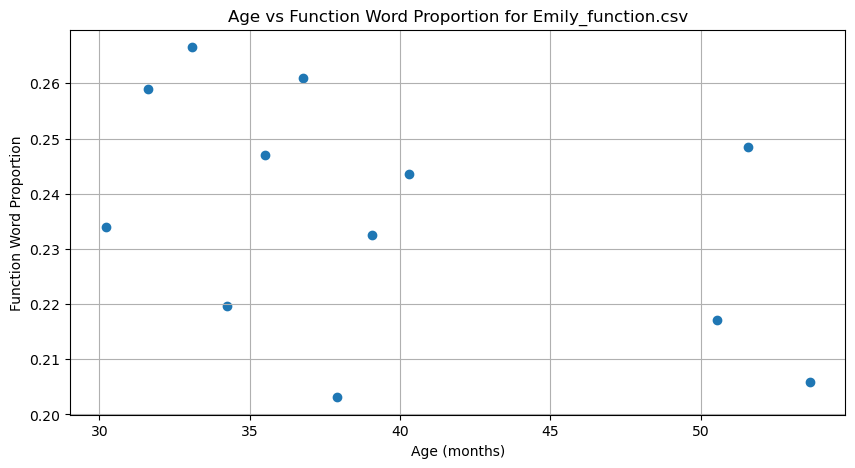

Spearman's rho for Emily_function.csv: -0.4196

Chosen Transcripts for Emily_function.csv: 
 ['020606.cha', '020718.cha', '020902.cha', '021007.cha', '021115.cha', '030023.cha', '030127.cha', '030302.cha', '030409.cha', '040216.cha', '040317.cha', '040519.cha'] 

Function Word Proportions for Emily_function.csv: 
 [0.23388252148997135, 0.25893566322478156, 0.266541822721598, 0.21972049689440995, 0.24695776664280603, 0.2609103707179728, 0.2031144211238998, 0.2324810606060606, 0.24361370716510902, 0.2171799027552674, 0.24851190476190477, 0.2058252427184466] 

Ages for Emily_function.csv: 
 [30.2, 31.6, 33.06666666666666, 34.233333333333334, 35.5, 36.766666666666666, 37.9, 39.06666666666667, 40.3, 50.53333333333333, 51.56666666666666, 53.63333333333333] 

Time Steps for Emily_function.csv: 
 [1.4000000000000021, 1.4666666666666615, 1.1666666666666714, 1.2666666666666657, 1.2666666666666657, 1.1333333333333329, 1.1666666666666714, 1.2333333333333272, 10.233333333333334, 1.0333333333333314,

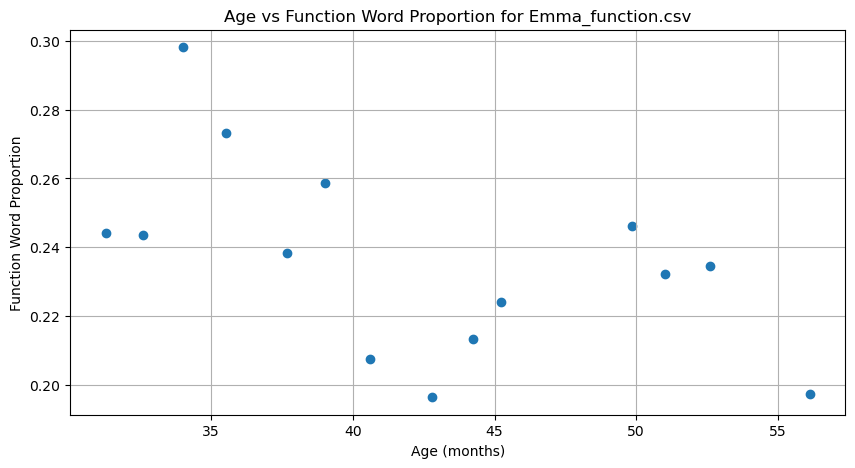

Spearman's rho for Emma_function.csv: -0.5560

Chosen Transcripts for Emma_function.csv: 
 ['020708.cha', '020818.cha', '021000.cha', '021116.cha', '030120.cha', '030300.cha', '030418.cha', '030624.cha', '030807.cha', '030907.cha', '040125.cha', '040300.cha', '040418.cha', '040804.cha'] 

Function Word Proportions for Emma_function.csv: 
 [0.24423963133640553, 0.24350205198358413, 0.29814814814814816, 0.2733333333333333, 0.23827751196172248, 0.2587646076794658, 0.20752565564424175, 0.19642857142857142, 0.21331058020477817, 0.22405498281786942, 0.2460691823899371, 0.2321608040201005, 0.23442622950819672, 0.19740634005763688] 

Ages for Emma_function.csv: 
 [31.266666666666666, 32.6, 34.0, 35.53333333333333, 37.666666666666664, 39.0, 40.6, 42.8, 44.233333333333334, 45.233333333333334, 49.833333333333336, 51.0, 52.6, 56.13333333333333] 

Time Steps for Emma_function.csv: 
 [1.3333333333333357, 1.3999999999999986, 1.5333333333333314, 2.133333333333333, 1.3333333333333357, 1.600000000000001

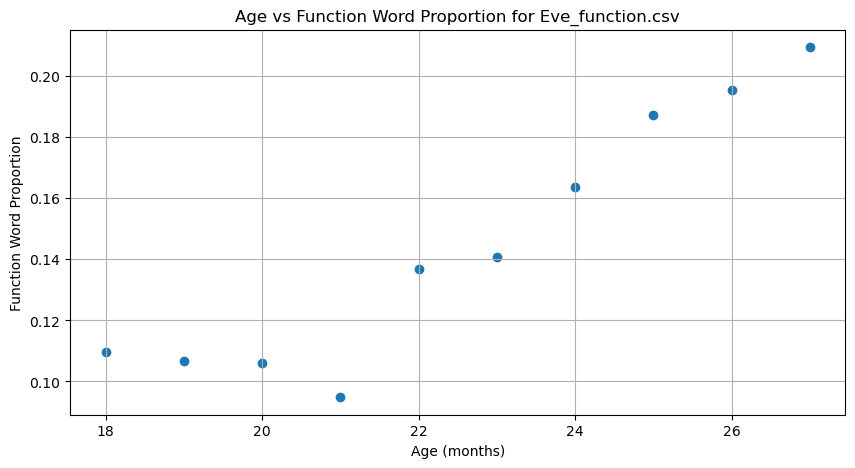

Spearman's rho for Eve_function.csv: 0.8788

Chosen Transcripts for Eve_function.csv: 
 ['010600a.cha', '010700a.cha', '010800.cha', '010900a.cha', '011000a.cha', '011100a.cha', '020000a.cha', '020100a.cha', '020200a.cha', '020300a.cha'] 

Function Word Proportions for Eve_function.csv: 
 [0.10950854700854701, 0.10666666666666667, 0.10590440487347703, 0.09483248154457695, 0.13670886075949368, 0.14084507042253522, 0.16377952755905512, 0.18725868725868725, 0.19538093973984602, 0.20947901591895804] 

Ages for Eve_function.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_function.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



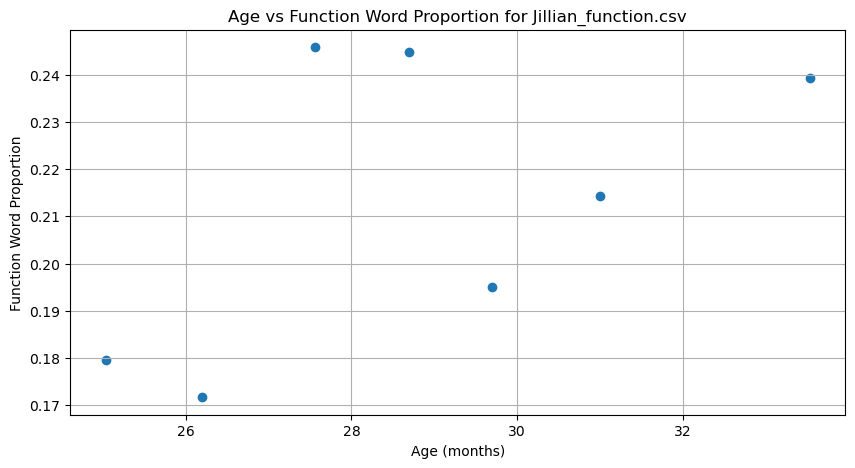

Spearman's rho for Jillian_function.csv: 0.3929

Chosen Transcripts for Jillian_function.csv: 
 ['020101.cha', '020206.cha', '020317.cha', '020421.cha', '020521.cha', '020700.cha', '020916.cha'] 

Function Word Proportions for Jillian_function.csv: 
 [0.1795774647887324, 0.17169811320754716, 0.24577987846049967, 0.24470416362308253, 0.1950207468879668, 0.21428571428571427, 0.23933209647495363] 

Ages for Jillian_function.csv: 
 [25.033333333333335, 26.2, 27.566666666666666, 28.7, 29.7, 31.0, 33.53333333333333] 

Time Steps for Jillian_function.csv: 
 [1.1666666666666643, 1.3666666666666671, 1.1333333333333329, 1.0, 1.3000000000000007, 2.5333333333333314] 



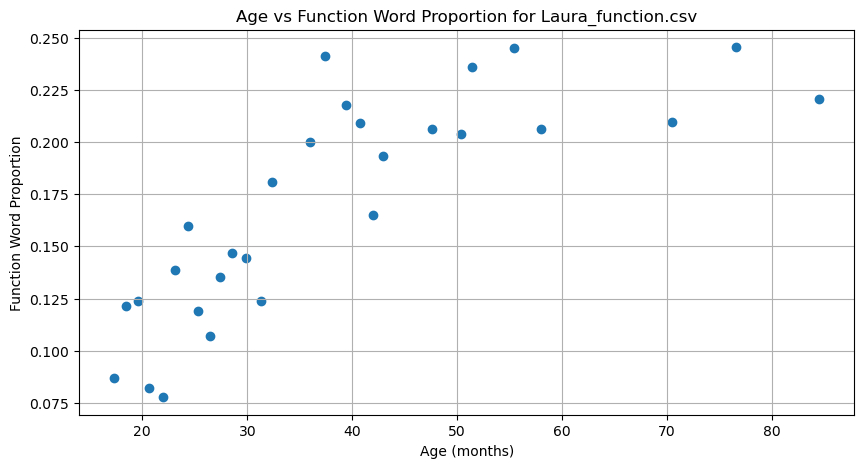

Spearman's rho for Laura_function.csv: 0.8741

Chosen Transcripts for Laura_function.csv: 
 ['010510.cha', '010614a.cha', '010717.cha', '010819.cha', '011000.cha', '011103.cha', '020010.cha', '020110.cha', '020212a.cha', '020312.cha', '020416.cha', '020526.cha', '020708.cha', '020811.cha', '030000.cha', '030113.cha', '030311.cha', '030422.cha', '030528a.cha', '030628.cha', '031117.cha', '040211a.cha', '040311a.cha', '040711a.cha', '041000.cha', '051013.cha', '060417.cha', '070014.cha'] 

Function Word Proportions for Laura_function.csv: 
 [0.08684863523573201, 0.12149532710280374, 0.12359550561797752, 0.08196721311475409, 0.0777027027027027, 0.13866231647634583, 0.16, 0.1189710610932476, 0.10695187165775401, 0.13544668587896252, 0.14705882352941177, 0.14446952595936793, 0.12387387387387387, 0.1806853582554517, 0.2, 0.2413793103448276, 0.21785714285714286, 0.20930232558139536, 0.16524216524216523, 0.1935483870967742, 0.20647149460708783, 0.20388349514563106, 0.2361111111111111, 0.244956

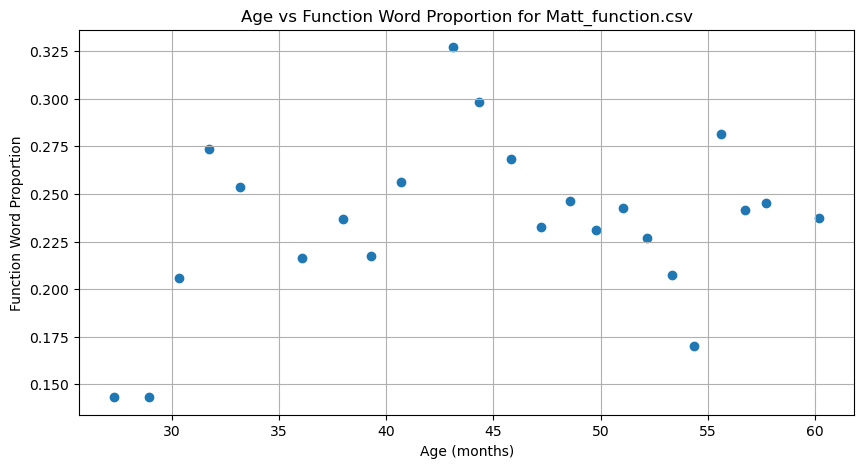

Spearman's rho for Matt_function.csv: 0.1927

Chosen Transcripts for Matt_function.csv: 
 ['020310.cha', '020428.cha', '020611.cha', '020722.cha', '020905.cha', '030002.cha', '030129.cha', '030309.cha', '030421.cha', '030704.cha', '030810.cha', '030924.cha', '031106.cha', '040017.cha', '040123.cha', '040301.cha', '040405.cha', '040509.cha', '040610.cha', '040718.cha', '040821.cha', '040921.cha', '050005.cha'] 

Function Word Proportions for Matt_function.csv: 
 [0.14336917562724014, 0.14325842696629212, 0.20601851851851852, 0.27354709418837675, 0.2538940809968847, 0.21649484536082475, 0.23709167544783982, 0.2175, 0.2564841498559078, 0.3270637408568443, 0.2981859410430839, 0.26817640047675806, 0.23272727272727273, 0.2461977186311787, 0.23128342245989306, 0.24281984334203655, 0.22669735327963175, 0.20723684210526316, 0.169921875, 0.2815884476534296, 0.24175824175824176, 0.245105716523101, 0.23728813559322035] 

Ages for Matt_function.csv: 
 [27.333333333333332, 28.933333333333334, 30.366

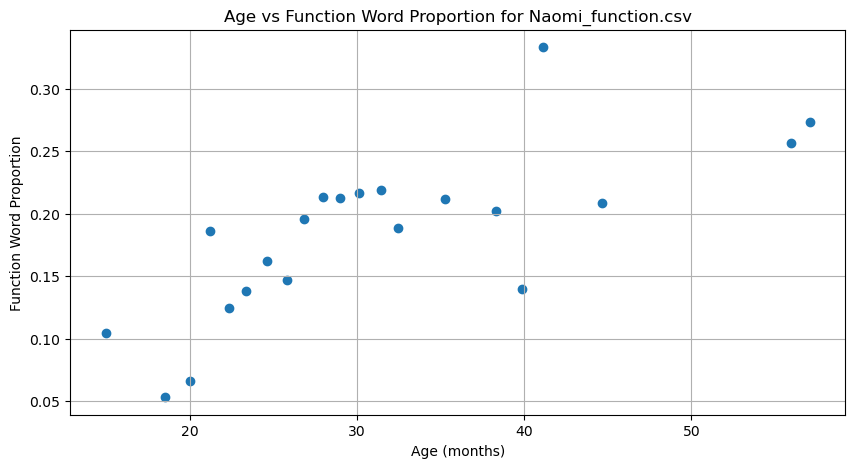

Spearman's rho for Naomi_function.csv: 0.7779

Chosen Transcripts for Naomi_function.csv: 
 ['010229.cha', '010616.cha', '010800.cha', '010907.cha', '011010a.cha', '011111.cha', '020018.cha', '020125.cha', '020225.cha', '020329.cha', '020430.cha', '020604.cha', '020713.cha', '020814.cha', '021108.cha', '030210.cha', '030326.cha', '030503.cha', '030819.cha', '040728.cha', '040903.cha'] 

Function Word Proportions for Naomi_function.csv: 
 [0.10476190476190476, 0.053117782909930716, 0.06593406593406594, 0.18584070796460178, 0.1242603550295858, 0.13823529411764707, 0.16248693834900732, 0.14675052410901468, 0.19596199524940616, 0.21329639889196675, 0.21245828698553948, 0.21686746987951808, 0.21875, 0.18834355828220858, 0.2115677321156773, 0.20245979186376536, 0.13986013986013987, 0.3333333333333333, 0.20844686648501362, 0.2565742714996446, 0.2738359201773836] 

Ages for Naomi_function.csv: 
 [14.966666666666667, 18.53333333333333, 20.0, 21.233333333333334, 22.333333333333336, 23.3666666666

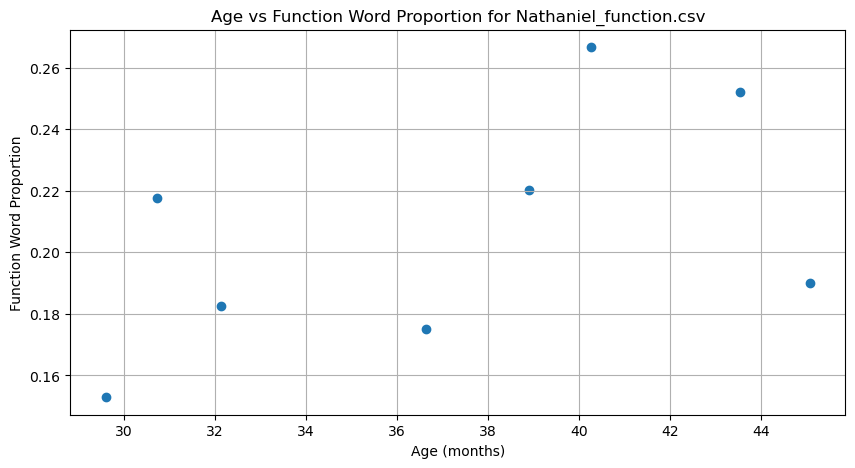

Spearman's rho for Nathaniel_function.csv: 0.5952

Chosen Transcripts for Nathaniel_function.csv: 
 ['020518a.cha', '020622a.cha', '020804a.cha', '030019a.cha', '030227a.cha', '030408a.cha', '030716.cha', '030902.cha'] 

Function Word Proportions for Nathaniel_function.csv: 
 [0.1529051987767584, 0.21763698630136985, 0.18269230769230768, 0.1752136752136752, 0.22034764826175868, 0.26666666666666666, 0.25225225225225223, 0.1900709219858156] 

Ages for Nathaniel_function.csv: 
 [29.6, 30.733333333333334, 32.13333333333333, 36.63333333333333, 38.9, 40.266666666666666, 43.53333333333333, 45.06666666666666] 

Time Steps for Nathaniel_function.csv: 
 [1.1333333333333329, 1.3999999999999986, 4.5, 2.2666666666666657, 1.3666666666666671, 3.2666666666666657, 1.5333333333333314] 



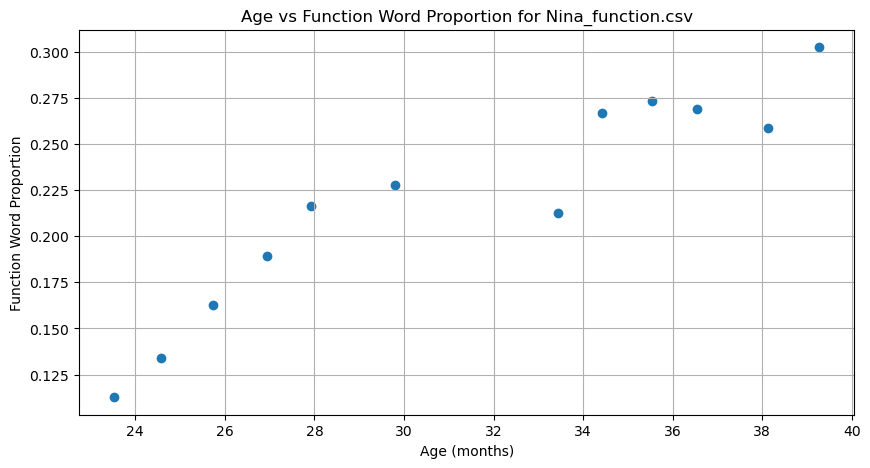

Spearman's rho for Nina_function.csv: 0.9301

Chosen Transcripts for Nina_function.csv: 
 ['011116.cha', '020017.cha', '020122.cha', '020228.cha', '020328.cha', '020524.cha', '020913.cha', '021013.cha', '021116.cha', '030016.cha', '030204.cha', '030308.cha'] 

Function Word Proportions for Nina_function.csv: 
 [0.11268817204301075, 0.1338862559241706, 0.16255944660613922, 0.18907875185735512, 0.21660377358490565, 0.22769871572370703, 0.2125097125097125, 0.26676279740447006, 0.27309968138370505, 0.26883780332056195, 0.25862577410793275, 0.30253807106598984] 

Ages for Nina_function.csv: 
 [23.53333333333333, 24.566666666666666, 25.733333333333334, 26.933333333333334, 27.933333333333334, 29.8, 33.43333333333334, 34.43333333333334, 35.53333333333333, 36.53333333333333, 38.13333333333333, 39.266666666666666] 

Time Steps for Nina_function.csv: 
 [1.033333333333335, 1.1666666666666679, 1.1999999999999993, 1.0, 1.8666666666666671, 3.6333333333333364, 1.0, 1.0999999999999943, 1.0, 1.600000000

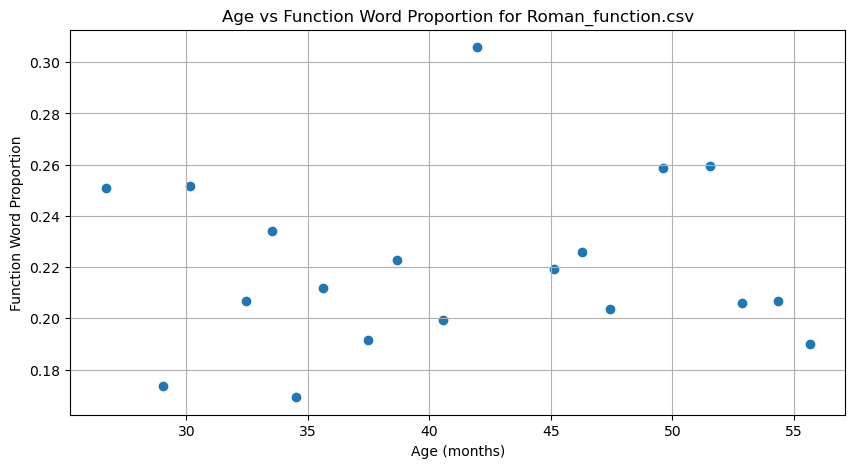

Spearman's rho for Roman_function.csv: 0.0175

Chosen Transcripts for Roman_function.csv: 
 ['020220.cha', '020501.cha', '020604.cha', '020814.cha', '020915.cha', '021015.cha', '021118.cha', '030114.cha', '030220.cha', '030417.cha', '030529.cha', '030904.cha', '031009.cha', '031113.cha', '040119.cha', '040317.cha', '040426.cha', '040611.cha', '040720.cha'] 

Function Word Proportions for Roman_function.csv: 
 [0.25072886297376096, 0.17355371900826447, 0.2516025641025641, 0.20663811563169165, 0.23413379073756432, 0.16923076923076924, 0.2116788321167883, 0.19148936170212766, 0.22262773722627738, 0.199375, 0.30583756345177665, 0.21934604904632152, 0.22606060606060607, 0.20358910891089108, 0.25868725868725867, 0.2595846645367412, 0.20597652081109924, 0.2066420664206642, 0.1900763358778626] 

Ages for Roman_function.csv: 
 [26.666666666666668, 29.03333333333333, 30.133333333333333, 32.46666666666667, 33.5, 34.5, 35.6, 37.46666666666667, 38.666666666666664, 40.56666666666666, 41.966666666666

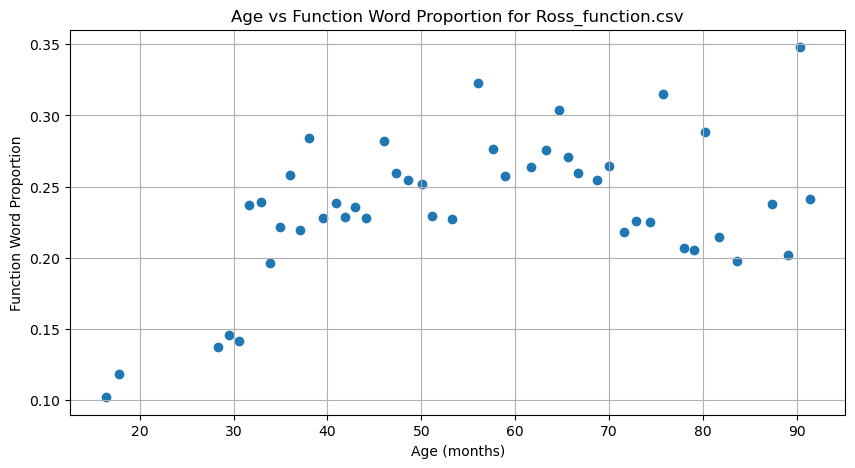

Spearman's rho for Ross_function.csv: 0.2999

Chosen Transcripts for Ross_function.csv: 
 ['010411a.cha', '010523.cha', '020409.cha', '020514a.cha', '020617a.cha', '020718a.cha', '020827a.cha', '020928.cha', '021100a.cha', '030001a.cha', '030101.cha', '030202.cha', '030315a.cha', '030426a.cha', '030526a.cha', '030628.cha', '030803a.cha', '031001.cha', '031109.cha', '040019.cha', '040201.cha', '040305a.cha', '040508a.cha', '040800a.cha', '040920a.cha', '041027a.cha', '050120a.cha', '050309a.cha', '050420a.cha', '050520a.cha', '050622a.cha', '050820a.cha', '051001a.cha', '051117a.cha', '060027b.cha', '060211a1.cha', '060323a.cha', '060530a.cha', '060701a.cha', '060807a.cha', '060922a.cha', '061119a.cha', '070309a.cha', '070503a.cha', '070600b.cha', '070712.cha'] 

Function Word Proportions for Ross_function.csv: 
 [0.10194174757281553, 0.11803713527851459, 0.13721804511278196, 0.14543114543114544, 0.1414448669201521, 0.2372093023255814, 0.2392638036809816, 0.1965065502183406, 0.221837088

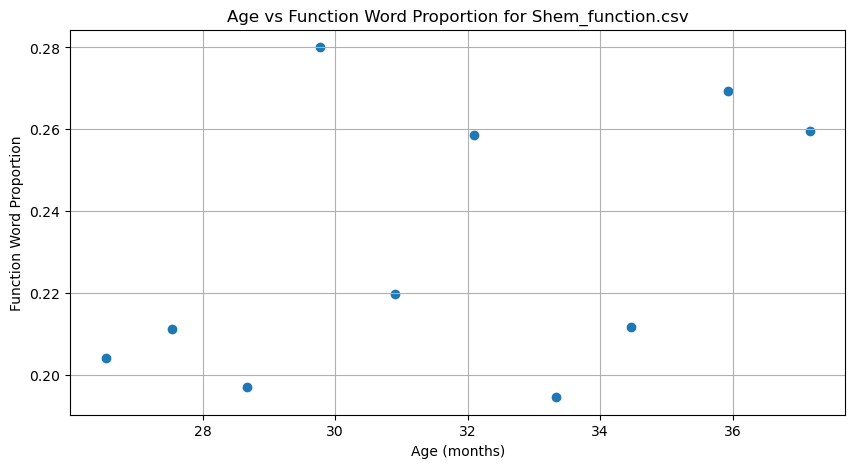

Spearman's rho for Shem_function.csv: 0.4182

Chosen Transcripts for Shem_function.csv: 
 ['020216.cha', '020316.cha', '020420.cha', '020523.cha', '020627.cha', '020803.cha', '020910.cha', '021014.cha', '021128.cha', '030105.cha'] 

Function Word Proportions for Shem_function.csv: 
 [0.20412979351032448, 0.21129943502824858, 0.1971326164874552, 0.2800476001586672, 0.21966426858513188, 0.25850606179116153, 0.19456244689889549, 0.21175166297117518, 0.26939243408482993, 0.25960118168389956] 

Ages for Shem_function.csv: 
 [26.53333333333333, 27.53333333333333, 28.666666666666668, 29.766666666666666, 30.9, 32.1, 33.333333333333336, 34.46666666666667, 35.93333333333334, 37.166666666666664] 

Time Steps for Shem_function.csv: 
 [1.0, 1.1333333333333364, 1.0999999999999979, 1.1333333333333329, 1.2000000000000028, 1.2333333333333343, 1.1333333333333329, 1.4666666666666686, 1.2333333333333272] 



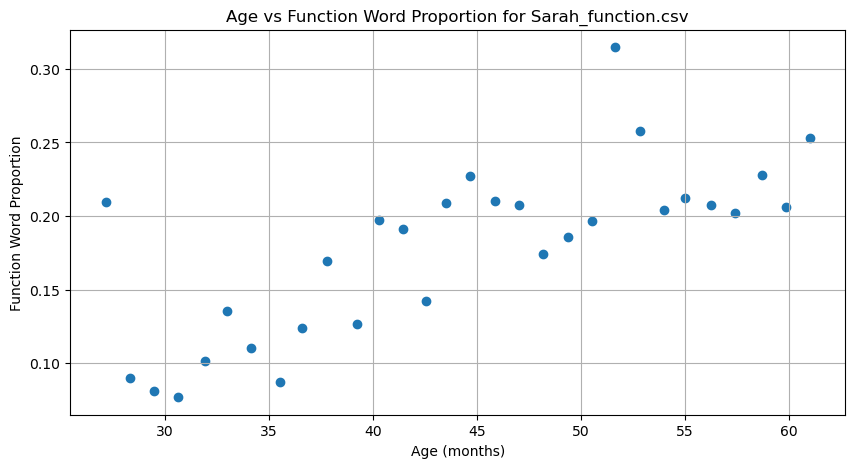

Spearman's rho for Sarah_function.csv: 0.7148

Chosen Transcripts for Sarah_function.csv: 
 ['020305.cha', '020410.cha', '020515.cha', '020620.cha', '020728.cha', '020900.cha', '021005.cha', '021117.cha', '030018a.cha', '030124.cha', '030307a.cha', '030409.cha', '030513.cha', '030616.cha', '030716.cha', '030820.cha', '030926a.cha', '031030.cha', '040005.cha', '040111.cha', '040216.cha', '040319.cha', '040425.cha', '040529.cha', '040700.cha', '040807.cha', '040912.cha', '041021.cha', '041126.cha', '050030.cha'] 

Function Word Proportions for Sarah_function.csv: 
 [0.20958083832335328, 0.09003601440576231, 0.08132147395171538, 0.07686832740213523, 0.1011764705882353, 0.13554987212276215, 0.11000827129859388, 0.08712984054669703, 0.12389380530973451, 0.1695852534562212, 0.12686567164179105, 0.19745222929936307, 0.19095092024539878, 0.14220183486238533, 0.20912547528517111, 0.22746781115879827, 0.21028466483011937, 0.20740103270223753, 0.17406143344709898, 0.1854082998661312, 0.1966403162

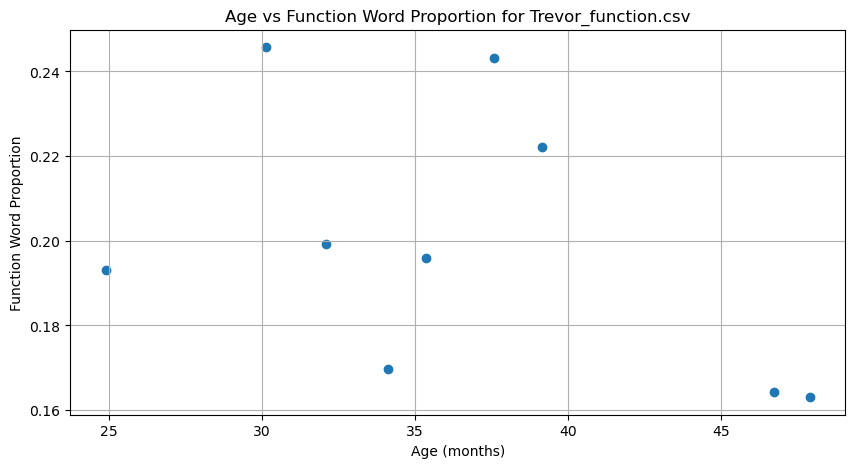

Spearman's rho for Trevor_function.csv: -0.4333

Chosen Transcripts for Trevor_function.csv: 
 ['020027.cha', '020604.cha', '020803.cha', '021004.cha', '021111.cha', '030117.cha', '030304.cha', '031022.cha', '031127a.cha'] 

Function Word Proportions for Trevor_function.csv: 
 [0.19298245614035087, 0.2457185405807893, 0.19930374238468232, 0.16961789375582478, 0.19589743589743588, 0.2430622009569378, 0.2220408163265306, 0.16421291053227632, 0.16303219106957426] 

Ages for Trevor_function.csv: 
 [24.9, 30.133333333333333, 32.1, 34.13333333333333, 35.36666666666667, 37.56666666666667, 39.13333333333333, 46.733333333333334, 47.9] 

Time Steps for Trevor_function.csv: 
 [5.233333333333334, 1.9666666666666686, 2.0333333333333314, 1.2333333333333343, 2.200000000000003, 1.5666666666666629, 7.600000000000001, 1.1666666666666643] 



In [7]:
age_function_plots(function_files_all, spearman_rhos_all, age_files)

## Spearman's ρ

In [8]:
spearman_rhos_50

[['Abe_function50.csv', 0.47724997514143214],
 ['Adam_function50.csv', 0.7338006604083994],
 ['Benjamin_function50.csv', -0.5428571428571429],
 ['Emily_function50.csv', -0.25874125874125875],
 ['Emma_function50.csv', -0.3318681318681319],
 ['Eve_function50.csv', 0.9272727272727272],
 ['Jillian_function50.csv', 0.39285714285714296],
 ['Laura_function50.csv', 0.8828680897646416],
 ['Matt_function50.csv', 0.38991847002069874],
 ['Naomi_function50.csv', 0.8714285714285716],
 ['Nathaniel_function50.csv', 0.9523809523809524],
 ['Nina_function50.csv', 0.6083916083916086],
 ['Roman_function50.csv', -0.09824561403508772],
 ['Ross_function50.csv', 0.1194572926302806],
 ['Shem_function50.csv', 0.8424242424242423],
 ['Sarah_function50.csv', 0.7374860956618465],
 ['Trevor_function50.csv', -0.21666666666666667]]

In [9]:
spearman_rhos_100

[['Abe_function100.csv', 0.6529477196885429],
 ['Adam_function100.csv', 0.7593162393162393],
 ['Benjamin_function100.csv', -0.6],
 ['Emily_function100.csv', -0.2027972027972028],
 ['Emma_function100.csv', -0.4769230769230769],
 ['Eve_function100.csv', 0.9393939393939393],
 ['Jillian_function100.csv', 0.642857142857143],
 ['Laura_function100.csv', 0.9146141215106732],
 ['Matt_function100.csv', 0.3191699604743083],
 ['Naomi_function100.csv', 0.8844155844155844],
 ['Nathaniel_function100.csv', 0.9047619047619048],
 ['Nina_function100.csv', 0.7062937062937064],
 ['Roman_function100.csv', -0.019298245614035085],
 ['Ross_function100.csv', 0.14239901325932777],
 ['Shem_function100.csv', 0.4666666666666666],
 ['Sarah_function100.csv', 0.7953281423804226],
 ['Trevor_function100.csv', 0.0]]

In [10]:
spearman_rhos_all

[['Abe_function.csv', 0.7272525027808675],
 ['Adam_function.csv', 0.8789743589743589],
 ['Benjamin_function.csv', -0.028571428571428574],
 ['Emily_function.csv', -0.41958041958041964],
 ['Emma_function.csv', -0.5560439560439561],
 ['Eve_function.csv', 0.8787878787878788],
 ['Jillian_function.csv', 0.39285714285714296],
 ['Laura_function.csv', 0.8741105637657363],
 ['Matt_function.csv', 0.1926877470355731],
 ['Naomi_function.csv', 0.7779220779220779],
 ['Nathaniel_function.csv', 0.5952380952380953],
 ['Nina_function.csv', 0.9300699300699302],
 ['Roman_function.csv', 0.01754385964912281],
 ['Ross_function.csv', 0.2999074930619796],
 ['Shem_function.csv', 0.41818181818181815],
 ['Sarah_function.csv', 0.7147942157953281],
 ['Trevor_function.csv', -0.43333333333333335]]